In [2]:
import os
os.chdir('/cluster/home/bdayan/girgs/benji_src/notebooks/')

In [3]:
import sys
sys.path.append('../')
sys.path.append('../../nemo-eva/src/')

import os
os.getcwd()




'/cluster/home/bdayan/girgs/benji_src/notebooks'

In [4]:
from benji_girgs import utils, generation, points, fitting, mcmc
import os
import glob
import pandas as pd
import networkit

import networkit as nk

from girg_sampling import girgs

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt

import do_feature_extract
import networkx as nx

import seaborn as sns

/cluster/scratch/bdayan/GIRG_data/socfb-Berkeley13.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-American75.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-UConn.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-MSU24.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Brandeis99.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Virginia63.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Duke14.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Indiana69.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Swarthmore42.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Simmons81.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Georgetown15.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Reed98.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-UC64.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Bowdoin47.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-UChicago30.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Middlebury45.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-MIT.SpaceOne
/cluster

In [4]:
import os
os.getcwd()
os.environ['DATA_PATH'] = '../../FE_FB_copyweights_cube/'

df = pd.read_csv(os.environ['DATA_PATH'] + '2-features/results.csv')

df.Info = df.Info.apply(lambda temp: {key: eval(var) for key, var in [x.split('=') for x in temp.split('|')]} if (type(temp) is str and '|' in temp) else {
    })
df['alpha'] = df.Info.apply(lambda x: x['alpha'] if 'alpha' in x else 1/float(x['t']) if 't' in x else None)

'/cluster/home/bdayan/girgs/benji_src/notebooks'

In [5]:
df.sort_values('Graph').loc[:, ['Graph', 'Model', 'Nodes', 'Info']]

,Graph,Model,Nodes,Info
89,socfb-American75,2d-copyweight-cube-girg,6338,"{'tau': 4.849201442177161, 'alpha': 1.05925190..."
79,socfb-American75,1d-copyweight-cube-girg,6356,"{'tau': 4.849201442177161, 'alpha': 1.07671601..."
101,socfb-American75,3d-copyweight-cube-girg,6341,"{'tau': 4.849201442177161, 'alpha': 1.05073058..."
21,socfb-Amherst41,2d-copyweight-cube-girg,2231,"{'tau': 5.642546890477902, 'alpha': 1.08566581..."
10,socfb-Amherst41,1d-copyweight-cube-girg,2228,"{'tau': 5.642546890477902, 'alpha': 1.11343075..."
...,...,...,...,...
15,socfb-Williams40,1d-copyweight-cube-girg,2785,"{'tau': 5.1655263550168184, 'alpha': 1.1181969..."
28,socfb-Williams40,2d-copyweight-cube-girg,2777,"{'tau': 5.1655263550168184, 'alpha': 1.0947656..."
140,socfb-Yale4,2d-copyweight-cube-girg,8506,"{'tau': 5.790413433544749, 'alpha': 1.04234527..."
151,socfb-Yale4,3d-copyweight-cube-girg,8519,"{'tau': 5.790413433544749, 'alpha': 1.02195608..."


In [6]:
df.iloc[21][['Graph', 'Model', 'Nodes', 'Info']]
df.iloc[21].Info
alpha, const = df.iloc[21].Info['alpha'], df.iloc[21].Info['const']
print(alpha, const)

Graph                                      socfb-Amherst41
Model                              2d-copyweight-cube-girg
Nodes                                                 2231
Info     {'tau': 5.642546890477902, 'alpha': 1.08566581...
Name: 21, dtype: object

{'tau': 5.642546890477902,
 'alpha': 1.0856658184902461,
 'const': 0.07032075311965111,
 'target_lcc': 0.31038565883277547,
 'fit_lcc': 0.31315930861965624,
 'fitting_time': 125.70397782325745,
 'hist': [(2.0, 0.5806831748986653),
  (1.342281879194631, 0.41895109431511535),
  (1.1527377521613833, 0.34452059998499895),
  (1.0767160161507403, 0.30865351018890325),
  (1.1134307585247043, 0.3260850350065316),
  (1.0947656517276771, 0.31476549433673373),
  (1.0856658184902461, 0.31055491921318823),
  (1.0856658184902461, 0.31055491921318823)]}

1.0856658184902461 0.07032075311965111


In [12]:
import pickle
import glob
folder = '/cluster/home/bdayan/girgs/MCMC_ordered6/'
fn_pickles = glob.glob(folder + 'pickles/*')
fn_dfs = glob.glob(folder + 'dfs/*')

# i = 1
# fn = fn_pickles[i]
# print(fn)
# with open(fn, 'rb') as f:
#     MC = pickle.load(f)
# fn = fn_dfs[i]
# print(fn)
# df = pd.read_csv(fn)

import re
df_out = pd.DataFrame(columns=['graph', 'd', 'nodes', 'll', 'CM', 'pec', 'alpha'])

for fn_df in fn_dfs:
    name, d, nodes = re.match(f'.*(socfb-.*)-(\d)d_nodes_(\d*).csv', fn_df).groups()
    d, nodes = int(d), int(nodes)
    df = pd.read_csv(fn_df)
    ll, CM, pec, alpha = df.ll, df.out, df.pec, df.alpha
    df_out = df_out.append({'graph': name, 'd': d, 'nodes': nodes, 'll': ll, 'CM': CM, 'pec': pec, 'alpha': alpha}, ignore_index=True)

df_out['final_pec'] = df_out.pec.apply(lambda x: x.iloc[-1])
df_out['final_ll'] = df_out.ll.apply(lambda x: x.iloc[-1])
df_out['final_alpha'] = df_out.alpha.apply(lambda x: x.iloc[-1])


In [13]:
df_out.shape

(89, 10)

In [24]:
df_out.sort_values(['nodes', 'd']).loc[:, ['graph', 'd', 'nodes', 'final_pec', 'final_ll', 'final_alpha']]

,graph,d,nodes,final_pec,final_ll,final_alpha
6,socfb-Caltech36,1,762,0.373371,-8.216017e+04,1.223201
7,socfb-Caltech36,2,762,0.408204,-7.848575e+04,1.212691
8,socfb-Caltech36,3,762,0.428983,-7.643693e+04,1.253927
11,socfb-Haverford76,1,1446,0.309789,-3.281807e+05,1.147509
12,socfb-Haverford76,2,1446,0.336572,-3.191943e+05,1.114424
...,...,...,...,...,...,...
66,socfb-UCSC68,2,8979,0.257599,-1.850235e+06,1.022327
63,socfb-Georgetown15,1,9388,0.209114,-3.380491e+06,1.057415
74,socfb-Georgetown15,2,9388,0.234350,-3.300675e+06,1.042252
64,socfb-Bingham82,1,10001,0.219305,-3.069836e+06,1.037347


<Figure size 800x600 with 0 Axes>

<AxesSubplot: xlabel='nodes', ylabel='final_pec'>

<AxesSubplot: xlabel='nodes', ylabel='final_pec'>

<AxesSubplot: xlabel='nodes', ylabel='final_pec'>

Text(0.5, 1.0, 'Final PEC vs. Nodes')

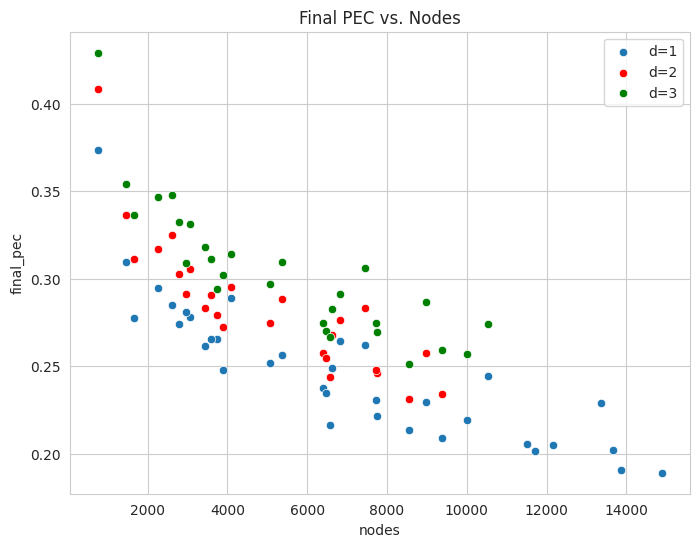

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_out.loc[df_out.d == 1, ['nodes', 'final_pec']], x='nodes', y='final_pec', label='d=1')
sns.scatterplot(data=df_out.loc[df_out.d == 2, ['nodes', 'final_pec']], x='nodes', y='final_pec', label='d=2', color='r')
sns.scatterplot(data=df_out.loc[df_out.d == 3, ['nodes', 'final_pec']], x='nodes', y='final_pec', label='d=3', color='g')
plt.legend()
plt.title('Final PEC vs. Nodes')
plt.savefig('/cluster/home/bdayan/mcmc_ordered_final_pec.png')


In [16]:
df_out.loc[df_out.d == 1, ['graph', 'nodes', 'final_pec']].sort_values('nodes').tail(8)

,graph,nodes,final_pec
72,socfb-Mississippi66,10519,0.244314
75,socfb-BC17,11498,0.205947
76,socfb-Columbia2,11706,0.201744
77,socfb-GWU54,12164,0.205288
78,socfb-USF51,13367,0.229312
79,socfb-Temple83,13653,0.202451
85,socfb-Northeastern19,13868,0.190622
87,socfb-UPenn7,14888,0.189318


(28, 8)


<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, '1d converged cube GIRG PECs')

Text(0.5, 0, 'Iteration')

Text(0, 0.5, 'PEC')

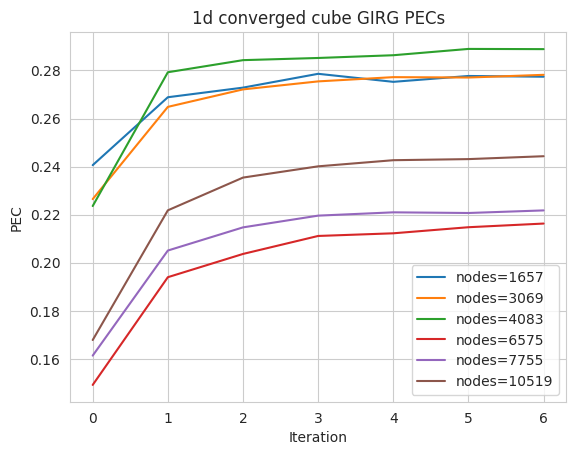

In [15]:
print(df_out.loc[df_out.d == 1].sort_values('nodes').shape)
plt.figure()
for i in range(2, 28, 5):
    row = df_out.loc[df_out.d == 1].sort_values('nodes').iloc[i]
    nodes = row.nodes
    pec = row.pec
    _ = plt.plot(pec, label=f'nodes={nodes}')
_ = plt.legend()
plt.title('1d converged cube GIRG PECs')
plt.xlabel('Iteration')
plt.ylabel('PEC')
plt.savefig('/cluster/home/bdayan/mcmc_ordered_1d_pec_convergence.png')

(26, 8)


<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, '2d converged cube GIRG PECs')

Text(0.5, 0, 'Iteration')

Text(0, 0.5, 'PEC')

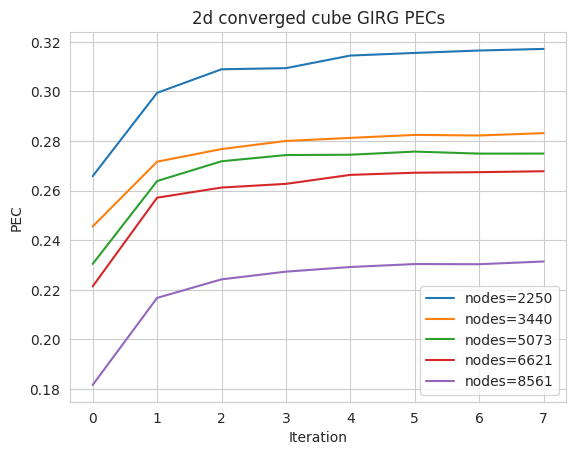

In [18]:
print(df_out.loc[df_out.d == 2].sort_values('nodes').shape)
plt.figure()
for i in range(3, 26, 5):
    row = df_out.loc[df_out.d == 2].sort_values('nodes').iloc[i]
    nodes = row.nodes
    pec = row.pec
    _ = plt.plot(pec, label=f'nodes={nodes}')
_ = plt.legend()
plt.title('2d converged cube GIRG PECs')
plt.xlabel('Iteration')
plt.ylabel('PEC')
plt.savefig('/cluster/home/bdayan/mcmc_ordered_2d_pec_convergence.png')

In [26]:
fn_dfs

['/cluster/home/bdayan/girgs/MCMC_ordered_girggen/dfs/800 node 1d cube GIRG gen; 1d fit cube GIRG.csv',
 '/cluster/home/bdayan/girgs/MCMC_ordered_girggen/dfs/800 node 1d cube GIRG gen; 2d fit cube GIRG.csv',
 '/cluster/home/bdayan/girgs/MCMC_ordered_girggen/dfs/1600 node 1d cube GIRG gen; 1d fit cube GIRG.csv',
 '/cluster/home/bdayan/girgs/MCMC_ordered_girggen/dfs/800 node 1d cube GIRG gen; 3d fit cube GIRG.csv',
 '/cluster/home/bdayan/girgs/MCMC_ordered_girggen/dfs/800 node 2d cube GIRG gen; 1d fit cube GIRG.csv',
 '/cluster/home/bdayan/girgs/MCMC_ordered_girggen/dfs/2500 node 1d cube GIRG gen; 1d fit cube GIRG.csv',
 '/cluster/home/bdayan/girgs/MCMC_ordered_girggen/dfs/1600 node 1d cube GIRG gen; 2d fit cube GIRG.csv',
 '/cluster/home/bdayan/girgs/MCMC_ordered_girggen/dfs/800 node 2d cube GIRG gen; 2d fit cube GIRG.csv',
 '/cluster/home/bdayan/girgs/MCMC_ordered_girggen/dfs/800 node 2d cube GIRG gen; 3d fit cube GIRG.csv',
 '/cluster/home/bdayan/girgs/MCMC_ordered_girggen/dfs/800 nod

In [5]:
import pickle
import glob
folder = '/cluster/home/bdayan/girgs/MCMC_ordered_girggen/'
fn_pickles = glob.glob(folder + 'pickles/*')
fn_dfs = glob.glob(folder + 'dfs/*')

# i = 1
# fn = fn_pickles[i]
# print(fn)
# with open(fn, 'rb') as f:
#     MC = pickle.load(f)
# fn = fn_dfs[i]
# print(fn)
# df = pd.read_csv(fn)

import re
df_out_girg = pd.DataFrame(columns=['d_gen', 'd_fit', 'nodes', 'll', 'CM', 'pec', 'alpha'])

for fn_df in fn_dfs:
    n, d_gen, d_fit = re.match(f'.*/(\d*) node (\d)d cube GIRG gen; (\d)d fit cube GIRG.csv', fn_df).groups()
    n, d_gen, d_fit = int(n), int(d_gen), int(d_fit)
    df = pd.read_csv(fn_df)
    ll, CM, pec, alpha = df.ll, df.out, df.pec, df.alpha
    df_out_girg = df_out_girg.append({'d_gen': d_gen, 'd_fit': d_fit, 'nodes': n, 'll': ll, 'CM': CM, 'pec': pec, 'alpha': alpha}, ignore_index=True)

df_out_girg['final_pec'] = df_out_girg.pec.apply(lambda x: x.iloc[-1])
df_out_girg['final_ll'] = df_out_girg.ll.apply(lambda x: x.iloc[-1])
df_out_girg['final_alpha'] = df_out_girg.alpha.apply(lambda x: x.iloc[-1])


<AxesSubplot: xlabel='nodes', ylabel='final_pec'>

<AxesSubplot: xlabel='nodes', ylabel='final_pec'>

<AxesSubplot: xlabel='nodes', ylabel='final_pec'>

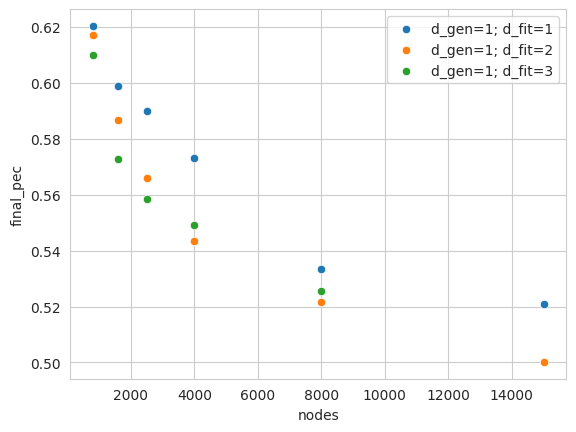

In [6]:
sns.scatterplot(data=df_out_girg.loc[(df_out_girg.d_gen == 1) & (df_out_girg.d_fit == 1), ['nodes', 'final_pec']], x='nodes', y='final_pec', label='d_gen=1; d_fit=1')
sns.scatterplot(data=df_out_girg.loc[(df_out_girg.d_gen == 1) & (df_out_girg.d_fit == 2), ['nodes', 'final_pec']], x='nodes', y='final_pec', label='d_gen=1; d_fit=2')
sns.scatterplot(data=df_out_girg.loc[(df_out_girg.d_gen == 1) & (df_out_girg.d_fit == 3), ['nodes', 'final_pec']], x='nodes', y='final_pec', label='d_gen=1; d_fit=3')


<AxesSubplot: xlabel='nodes', ylabel='final_pec'>

<AxesSubplot: xlabel='nodes', ylabel='final_pec'>

<AxesSubplot: xlabel='nodes', ylabel='final_pec'>

<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='nodes', ylabel='final_pec'>

<AxesSubplot: xlabel='nodes', ylabel='final_pec'>

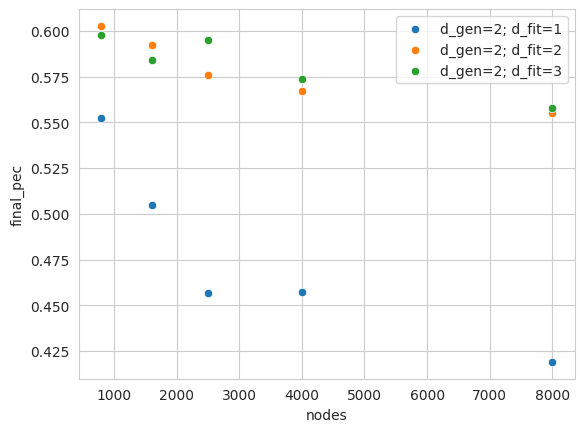

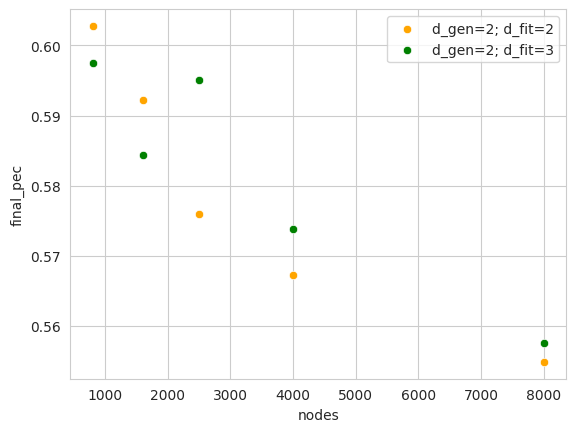

In [12]:
sns.scatterplot(data=df_out_girg.loc[(df_out_girg.d_gen == 2) & (df_out_girg.d_fit == 1), ['nodes', 'final_pec']], x='nodes', y='final_pec', label='d_gen=2; d_fit=1')
sns.scatterplot(data=df_out_girg.loc[(df_out_girg.d_gen == 2) & (df_out_girg.d_fit == 2), ['nodes', 'final_pec']], x='nodes', y='final_pec', label='d_gen=2; d_fit=2')
sns.scatterplot(data=df_out_girg.loc[(df_out_girg.d_gen == 2) & (df_out_girg.d_fit == 3), ['nodes', 'final_pec']], x='nodes', y='final_pec', label='d_gen=2; d_fit=3')

plt.figure()
sns.scatterplot(data=df_out_girg.loc[(df_out_girg.d_gen == 2) & (df_out_girg.d_fit == 2), ['nodes', 'final_pec']], x='nodes', y='final_pec', label='d_gen=2; d_fit=2', color='orange')
sns.scatterplot(data=df_out_girg.loc[(df_out_girg.d_gen == 2) & (df_out_girg.d_fit == 3), ['nodes', 'final_pec']], x='nodes', y='final_pec', label='d_gen=2; d_fit=3', color='green')

<AxesSubplot: xlabel='nodes', ylabel='final_pec'>

<AxesSubplot: xlabel='nodes', ylabel='final_pec'>

<AxesSubplot: xlabel='nodes', ylabel='final_pec'>

<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='nodes', ylabel='final_pec'>

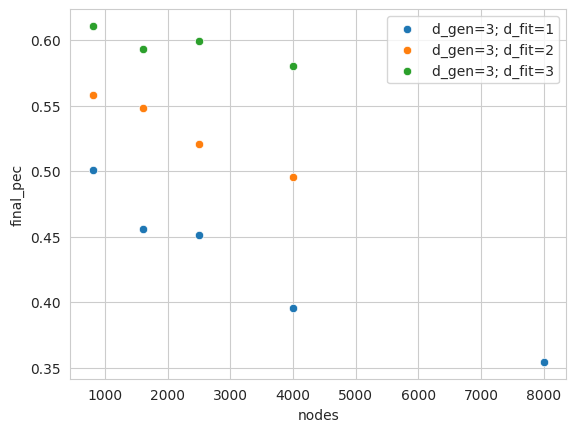

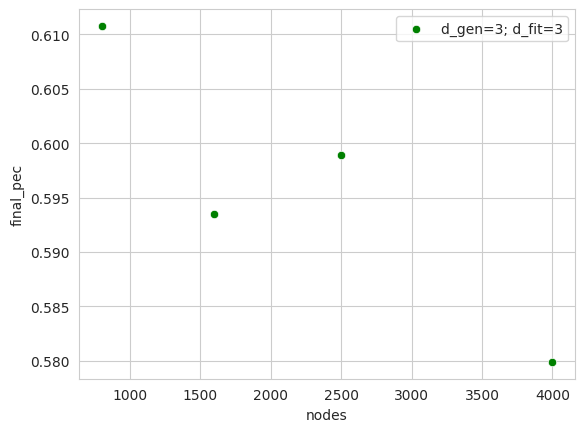

In [13]:
# same as previous cell but with d_gen = 3
sns.scatterplot(data=df_out_girg.loc[(df_out_girg.d_gen == 3) & (df_out_girg.d_fit == 1), ['nodes', 'final_pec']], x='nodes', y='final_pec', label='d_gen=3; d_fit=1')
sns.scatterplot(data=df_out_girg.loc[(df_out_girg.d_gen == 3) & (df_out_girg.d_fit == 2), ['nodes', 'final_pec']], x='nodes', y='final_pec', label='d_gen=3; d_fit=2')
sns.scatterplot(data=df_out_girg.loc[(df_out_girg.d_gen == 3) & (df_out_girg.d_fit == 3), ['nodes', 'final_pec']], x='nodes', y='final_pec', label='d_gen=3; d_fit=3')

plt.figure()
sns.scatterplot(data=df_out_girg.loc[(df_out_girg.d_gen == 3) & (df_out_girg.d_fit == 3), ['nodes', 'final_pec']], x='nodes', y='final_pec', label='d_gen=3; d_fit=3', color='green')

In [23]:
print(df_out.loc[df_out.d == 2].sort_values('nodes').shape)
plt.figure()
for i in range(3, 26, 5):
    row = df_out.loc[df_out.d == 2].sort_values('nodes').iloc[i]
    nodes = row.nodes
    pec = row.pec
    _ = plt.plot(pec, label=f'nodes={nodes}')
_ = plt.legend()
# plt.title('2d converged cube GIRG PECs')
# plt.xlabel('Iteration')
# plt.ylabel('PEC')
# plt.savefig('/cluster/home/bdayan/mcmc_ordered_girggen_final_pec.png')

,d_gen,d_fit,nodes,ll,CM,pec,alpha,final_pec,final_ll,final_alpha
0,1,1,10519,0 -91954.447569 1 -91708.933928 2 -91874...,0 [[ 26994 17218]\n [ 58460 537328]] 1 ...,0 0.610558 1 0.611327 2 0.612730 3 ...,0 1.399982 1 1.596245 2 1.729819 3 ...,0.620420,-9.239184e+04,1.997732
1,1,2,10519,0 -90820.741653 1 -90549.562879 2 -90815...,0 [[ 27568 17034]\n [ 58078 537320]] 1 ...,0 0.618089 1 0.622125 2 0.618089 3 ...,0 1.300000 1 1.365050 2 1.365050 3 ...,0.617192,-9.227993e+04,1.812536
2,1,1,10519,0 -201692.424776 1 -199527.544142 2 -199...,0 [[ 51212 38606]\n [ 121786 2348396]] 1...,0 0.570175 1 0.583179 2 0.582489 3 ...,0 1.332972 1 1.466088 2 1.548011 3 ...,0.598811,-2.038125e+05,2.330916
3,1,3,10519,0 -93033.859566 1 -92144.875263 2 -92152...,0 [[ 27198 17052]\n [ 58408 537342]] 1 ...,0 0.614644 1 0.607186 2 0.609898 3 ...,0 1.300000 1 1.300000 2 1.333044 3 ...,0.610124,-9.312764e+04,1.507939
4,2,1,10519,0 -93025.260098 1 -91330.921447 2 -90907...,0 [[ 20140 18592]\n [ 54288 546980]] 1 ...,0 0.519983 1 0.538934 2 0.537850 3 ...,0 1.300000 1 1.345233 2 1.345233 3 ...,0.552205,-9.041903e+04,1.428093
5,1,1,10519,0 -333771.314868 1 -328893.255485 2 -328...,0 [[ 81452 63074]\n [ 195492 5909982]] 1...,0 0.563580 1 0.578152 2 0.583245 3 ...,0 1.444617 1 1.535321 2 1.620082 3 ...,0.589832,-3.334171e+05,2.106539
6,1,2,10519,0 -204284.337655 1 -201969.296810 2 -201...,0 [[ 51914 38218]\n [ 121060 2348808]] 1...,0 0.575977 1 0.581547 2 0.585807 3 ...,0 1.300000 1 1.425214 2 1.504702 3 ...,0.586873,-2.029129e+05,1.691729
7,2,2,10519,0 -80881.964074 1 -80812.503640 2 -80857...,0 [[ 22612 15406]\n [ 50434 551548]] 1 ...,0 0.594771 1 0.595981 2 0.598611 3 ...,0 1.335474 1 1.384689 2 1.419184 3 ...,0.602767,-8.172318e+04,1.873103
8,2,3,10519,0 -79354.678648 1 -79085.852974 2 -79223...,0 [[ 22940 14814]\n [ 49494 552752]] 1 ...,0 0.607618 1 0.608147 2 0.606664 3 ...,0 1.343124 1 1.427546 2 1.524572 3 ...,0.597553,-8.000013e+04,1.578378
9,3,1,10519,0 -83786.159818 1 -81521.671774 2 -80819...,0 [[ 14202 16522]\n [ 44338 564938]] 1 ...,0 0.462244 1 0.484898 2 0.484637 3 ...,0 1.300000 1 1.300000 2 1.300000 3 ...,0.500456,-8.006840e+04,1.465670


<Figure size 640x480 with 0 Axes>

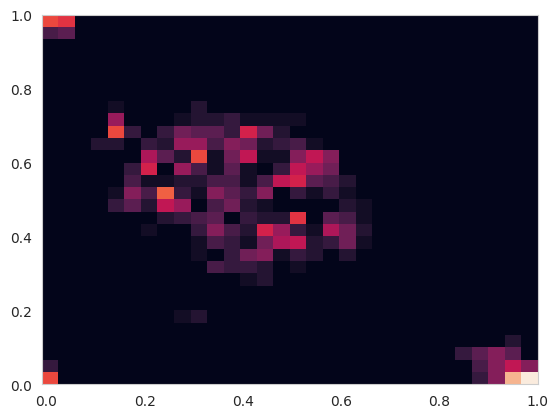

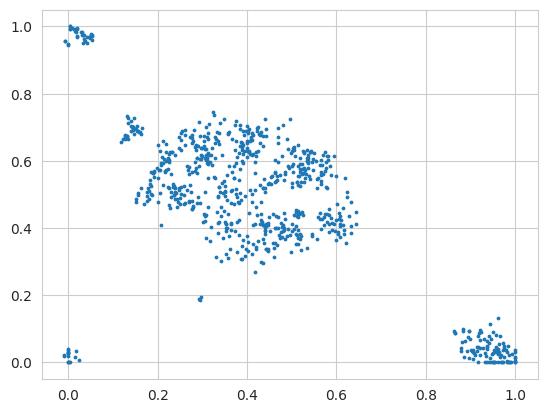

In [63]:
_ = plt.hist2d(MC.pts[:, 0], MC.pts[:, 1], bins=30)
plt.figure()
_ = plt.scatter(MC.pts[:, 0], MC.pts[:, 1], s=3.0)


In [64]:
MC.g

In [65]:
gd = list(filter(lambda x: x['Name'] == 'socfb-Caltech36', do_feature_extract.graph_dicts))[0]
in_path = gd['FullPath']
in_path
name = gd['Name']
g = networkit.readGraph(in_path, networkit.Format.EdgeListSpaceOne)
g = utils.get_largest_component(g)
nk.overview(g)
n = g.numberOfNodes()

'/cluster/scratch/bdayan/GIRG_data/socfb-Caltech36.SpaceOne'

Network Properties:
nodes, edges			762, 16651
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.057429
clustering coefficient		0.409117
min/max/avg degree		1, 248, 43.703412
degree assortativity		-0.065276
number of connected components	1
size of largest component	762 (100.00 %)


In [134]:
import importlib
importlib.reload(utils)

<module 'benji_girgs.utils' from '../benji_girgs/utils.py'>

<Figure size 640x480 with 0 Axes>

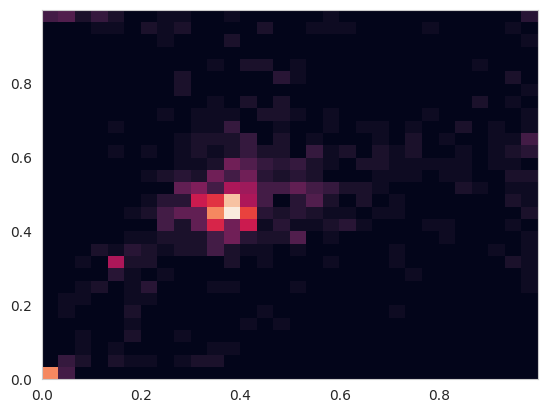

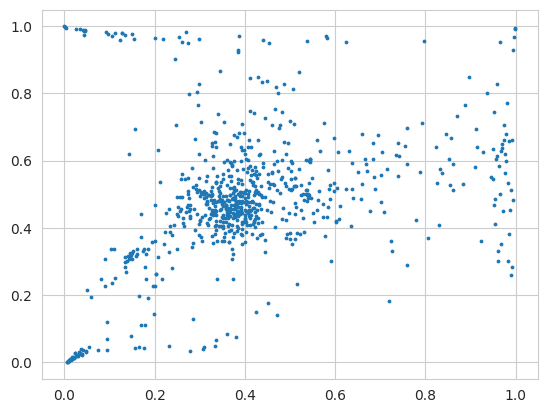

In [135]:
a, B, pts = utils.get_diffmap_and_points(g, process='restrict_uniform_edges', ds=2)
_ = plt.hist2d(pts[:, 0], pts[:, 1], bins=30)
plt.figure()
_ = plt.scatter(pts[:, 0], pts[:, 1], s=3.0)

In [136]:
pts.min()
pts.max()

0.0

0.9987179487179487

array([1.        , 0.9907076 , 0.9884762 , 0.98177108, 0.97827034,
       0.97313954, 0.97036471, 0.962236  , 0.96047128, 0.94830234])

<Figure size 640x480 with 0 Axes>

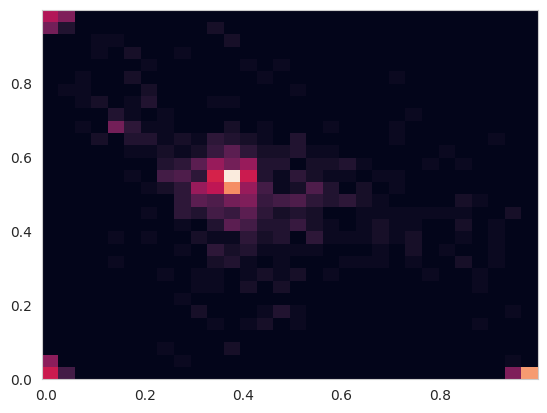

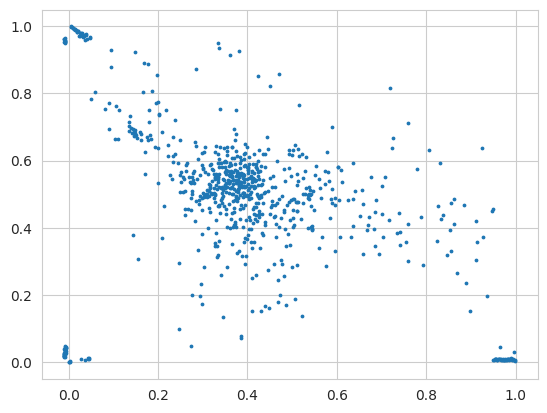

In [118]:
# a, B, pts = utils.get_diffmap_and_points(g, process='restrict_uniform_edges', ds=2)a
a

ds = 2
spare_evals=10
a, B, _, diff_map = utils.get_diffmap(g, sparse_evals=spare_evals)
pts = np.array([diff_map(i, 10) for i in range(g.numberOfNodes())])
pts = pts[:, :ds]

quantile = 0.05
pts_new = pts.copy()
pts_restricted, restriction = utils.restrict_to_quantiles(pts, quantile=quantile)
pts_restricted = points.normalise_points_to_cube(pts_restricted) * 0.9 + 0.05
pts_new[restriction, :] = pts_restricted

n, d = pts.shape

for i in range(d):
    small = pts[:, i] <= np.quantile(pts[:, i], quantile)
    big = pts[:, i] >= np.quantile(pts[:, i], 1-quantile)
    pts_new[small, i] = (pts[small, i].argsort().argsort() / small.sum()) * 0.05
    pts_new[big, i] = 0.95 + (pts[big, i].argsort().argsort() / big.sum()) * 0.05


_ = plt.hist2d(pts_new[:, 0], pts_new[:, 1], bins=30)
plt.figure()
_ = plt.scatter(pts_new[:, 0], pts_new[:, 1], s=3.0)



In [124]:
pts_new.min()
pts_restricted.min()
pts_restricted.max()

small0 = pts[:, 0] < np.quantile(pts[:, 0], quantile)
small1 = pts[:, 1] < np.quantile(pts[:, 1], quantile)

print('-----')
pts_new[small0, 0].min()
pts_new[small1, 1].min()
# print('-----')
# pts_new[big, 0].min()
# pts_new[big, 1].min()

-0.009736303441105135

0.05

0.9500000000000001

-----


0.0

0.0

In [128]:
pts_new[:, 0].argmin()

391

In [130]:
small0[391]

False

In [133]:
pts[391, 0], np.quantile(pts[:, 0], quantile)

(-0.009736303441105135, -0.009797549059822377)

In [96]:
i = 0
small = pts[:, i] < np.quantile(pts[:, i], quantile)
big = pts[:, i] > np.quantile(pts[:, i], 1-quantile)
pts_new[small, i].min()
# pts_new[big, i] = 0.95 + (pts[big, i].argsort().argsort() / big.sum()) * 0.05

0.0

In [116]:
small0 = pts[:, 0] < np.quantile(pts[:, 0], quantile)
small1 = pts[:, 1] < np.quantile(pts[:, 1], quantile)
np.logical_and(np.logical_or(small1, small0), restriction)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [117]:
pts_new[:, 1].argmin()

356

In [113]:
pts[356, 1]

-0.012005674767396293

In [115]:
pts[356, 1] < np.quantile(pts[:, 1], quantile)

True

In [114]:
np.quantile(pts[:, 1], quantile)

0.003910256410256416

In [83]:
a, B, _, diff_map = utils.get_diffmap(g, sparse_evals=10)
pts = np.array([diff_map(i, 10) for i in range(g.numberOfNodes())])
pts = pts[:, :2]
pts.min()

-0.6168074690418358

In [69]:
pts[:, 0].min()
pts[:, 1].min()

-0.044064520708652424

-0.4334082842084858

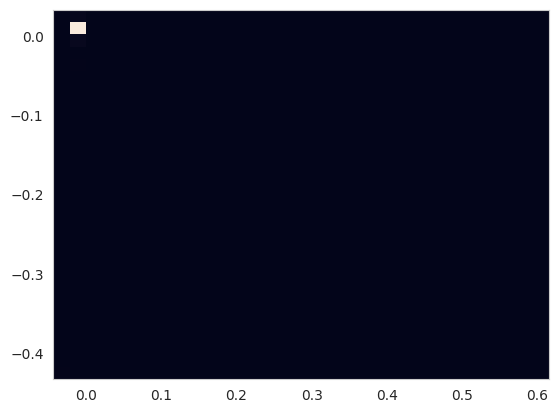

In [70]:
_ = plt.hist2d(pts[:, 0], pts[:, 1], bins=30)

In [71]:
i = 0
quantile=0.05
np.quantile(pts[:, i], quantile)
small = pts[:, i] < np.quantile(pts[:, i], quantile)

-0.00979754905983269

In [72]:
pts_new = pts.copy()
pts_new[small, i] = (pts[small, i].argsort().argsort() / small.sum()) * 0.05

In [75]:
pts_new[small, i].max()

0.04871794871794872

In [43]:
pts[small, i].min()

-0.04406452070917436

In [44]:
pts[small, i].argsort().argsort()

array([35, 22, 30,  0,  2,  3,  6, 13, 28, 19, 16, 17, 34, 23,  9, 36, 15,
        8, 38, 26, 11, 24, 10, 21,  7,  4, 12, 25, 31, 37, 33, 32,  5, 18,
       14, 29, 20, 27,  1])

In [7]:
import pickle
folder = '/cluster/home/bdayan/girgs/MCMC_ordered6/pickles/'
import glob
for fn in glob.glob(folder + '*'):
    print(fn)
    try:
        with open(fn, 'rb') as f:
            MC = pickle.load(f)
    except Exception as e:
        print(e)
        continue

    if MC.A_cl is not None:
        print(MC.A_cl.shape)
    else:
        print('no MC.A_cl')

    MC.A_cl = None
    with open(fn, 'wb') as f:
        pickle.dump(MC, f)

/cluster/home/bdayan/girgs/MCMC_ordered6/pickles/socfb-Caltech36-2d.pkl
no MC.A_cl
/cluster/home/bdayan/girgs/MCMC_ordered6/pickles/socfb-BC17-1d.pkl
no MC.A_cl
/cluster/home/bdayan/girgs/MCMC_ordered6/pickles/socfb-Columbia2-1d.pkl
no MC.A_cl
/cluster/home/bdayan/girgs/MCMC_ordered6/pickles/socfb-GWU54-1d.pkl
(12164, 12164)
/cluster/home/bdayan/girgs/MCMC_ordered6/pickles/socfb-USF51-1d.pkl
(13367, 13367)
/cluster/home/bdayan/girgs/MCMC_ordered6/pickles/socfb-Temple83-1d.pkl
(13653, 13653)
/cluster/home/bdayan/girgs/MCMC_ordered6/pickles/socfb-Villanova62-3d.pkl
(7755, 7755)
/cluster/home/bdayan/girgs/MCMC_ordered6/pickles/socfb-WashU32-3d.pkl
(7730, 7730)
/cluster/home/bdayan/girgs/MCMC_ordered6/pickles/socfb-Yale4-3d.pkl
(8561, 8561)
/cluster/home/bdayan/girgs/MCMC_ordered6/pickles/socfb-UCSC68-3d.pkl
(8979, 8979)
/cluster/home/bdayan/girgs/MCMC_ordered6/pickles/socfb-Georgetown15-3d.pkl
(9388, 9388)
/cluster/home/bdayan/girgs/MCMC_ordered6/pickles/socfb-Bingham82-3d.pkl
(10001, 100

In [28]:
import sys
import inspect
import logging

logger = logging.getLogger(__name__)

def get_size(obj, seen=None):
    """Recursively finds size of objects in bytes"""
    size = sys.getsizeof(obj)
    if seen is None:
        seen = set()
    obj_id = id(obj)
    if obj_id in seen:
        return 0
    # Important mark as seen *before* entering recursion to gracefully handle
    # self-referential objects
    seen.add(obj_id)
    if hasattr(obj, '__dict__'):
        for cls in obj.__class__.__mro__:
            if '__dict__' in cls.__dict__:
                d = cls.__dict__['__dict__']
                if inspect.isgetsetdescriptor(d) or inspect.ismemberdescriptor(d):
                    size += get_size(obj.__dict__, seen)
                break
    if isinstance(obj, dict):
        size += sum((get_size(v, seen) for v in obj.values()))
        size += sum((get_size(k, seen) for k in obj.keys()))
    elif hasattr(obj, '__iter__') and not isinstance(obj, (str, bytes, bytearray)):
        try:
            size += sum((get_size(i, seen) for i in obj))
        except TypeError:
            logging.exception("Unable to get size of %r. This may lead to incorrect sizes. Please report this error.", obj)
    if hasattr(obj, '__slots__'): # can have __slots__ with __dict__
        size += sum(get_size(getattr(obj, s), seen) for s in obj.__slots__ if hasattr(obj, s))

    return size

In [31]:
MC.A_cl

array([[0, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [30]:
# get size of each attribute in MC
for attr in dir(MC):
    if not attr.startswith('__'):
        print(attr, get_size(getattr(MC, attr)))

ERROR:root:Unable to get size of <class 'benji_girgs.points.PointsCube'>. This may lead to incorrect sizes. Please report this error.
Traceback (most recent call last):
  File "/scratch/tmp.23328786.bdayan/ipykernel_96784/1980826443.py", line 30, in get_size
    size += sum((get_size(i, seen) for i in obj))
TypeError: 'type' object is not iterable


A 16
A_cl 44640
MC_to_g_A 64
acceptance_prob 64
acceptance_prob_static 200
acceptances_plot 64
alpha 32
alpha_update 64
c_cl 32
calculate_ll 64
calibrate_const 64
chung_lu_ll 32
cl_mixin_prob 24
const 32
const_in 32
d 28
er_ll 32
expected_num_edges 32
failure_prob 24
fix_lls_and_const 64
g 16
gen_girg 64
get_CM 64
get_p_u_to_vs 200
get_u_ll_and_expected_num_edges 200
graph_name 67
ll 32
ll_steps 112
lls 1140
n 28
num_acceptances 24
num_steps 24
ordered_point_propose_compare_update 64
ordered_pts_const_alpha_loop 64
out_cl 512
outs 2700
p_u_to_vs_to_ll 200
percent_edges_captured_cl 32
percent_edges_captureds 1196
percent_fake_edges_wrong_cl 32
pickle 64
plot_ll 64
pool 24
pool_step 64
probs_cl 16
proposal 200
pts 760
pts_type 1382
run 64
run_pool 64
run_pool2 64
save_plot 64
step0 64
step1 64
step2 64
step_pool 64
weights 24496
weights_original 24496


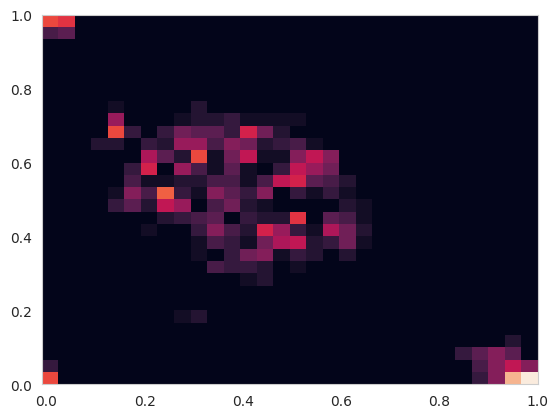

In [47]:
_ = plt.hist2d(MC.pts[:, 0], MC.pts[:, 1], bins=30)

In [48]:
MC.ll
MC.outs
MC.percent_edges_captureds
MC.alpha

-78683.78667156446

[(array([[  7808,  25494],
         [ 27546, 519796]]),
  0),
 (array([[ 11708,  21594],
         [ 21598, 525744]]),
  0),
 (array([[ 12806,  20496],
         [ 20088, 527254]]),
  1),
 (array([[ 13278,  20024],
         [ 19966, 527376]]),
  2),
 (array([[ 13360,  19942],
         [ 20000, 527342]]),
  3),
 (array([[ 13330,  19972],
         [ 19556, 527786]]),
  4),
 (array([[ 13456,  19846],
         [ 19604, 527738]]),
  5),
 (array([[ 13448,  19854],
         [ 19916, 527426]]),
  6),
 (array([[ 13452,  19850],
         [ 19558, 527784]]),
  7)]

[(0.23446039276920305, 0),
 (0.3515704762476728, 0),
 (0.384541468980842, 1),
 (0.39871479190439013, 2),
 (0.4011771064800913, 3),
 (0.4002762596841031, 4),
 (0.4040598162272536, 5),
 (0.4038195904149901, 6),
 (0.40393970332112183, 7)]

1.19471842771516

In [22]:
df = pd.read_csv('/cluster/home/bdayan/girgs/MCMC_ordered/dfs/socfb-Reed98-2d.csv')
df.ll.iloc[-1] < df.ll.max()

False

In [23]:
df.ll

0   -116180.508558
1   -112720.988340
2   -110403.213141
Name: ll, dtype: float64

In [225]:
n = 1500
d=2
tau=2.1
alpha=1.2
desiredAvgDegree=100.0
points_type = points.get_points_distorted(np.array([1.0, 0.6]), cube=True)
points_type=points.PointsCube
g, edges, weights, pts, const = generation.generate_GIRG_nk(n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree,
                                                                points_type=points_type)

g = utils.get_largest_component(g)
nk.overview(g)
n = g.numberOfNodes()

Network Properties:
nodes, edges			1500, 59097
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.052566
clustering coefficient		0.588076
min/max/avg degree		7, 1358, 78.796000
degree assortativity		-0.229293
number of connected components	1
size of largest component	1500 (100.00 %)


Text(0.5, 0, 'diffmap x_0')

Text(0, 0.5, 'diffmap x_1')

Text(0.5, 1.0, 'n=1500 1d cube GIRG diffmap with gamma=0.9')

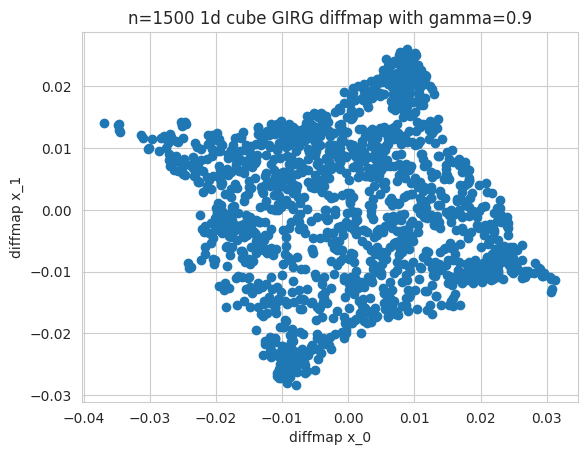

In [226]:
n = g.numberOfNodes()

gnx = nk.nxadapter.nk2nx(g)
A = nx.adjacency_matrix(gnx).todense()

weights = np.array(utils.graph_degrees_to_weights(g))

a, B, pts_dm = utils.get_diffmap_and_points(g, ds=2, process=None)
# a, B, _, diff_map = utils.get_diffmap(g, sparse_evals=10, gamma=0.9)
# pts_dm = np.array([diff_map(i, 10) for i in range(g.numberOfNodes())])
# pts_dm = pts_dm[:, :2]

# _ = plt.hist2d(pts_dm[:, 0], pts_dm[:, 1], bins=30)
_ = plt.scatter(pts_dm[:, 0], pts_dm[:, 1])
plt.xlabel('diffmap x_0')
plt.ylabel('diffmap x_1')
plt.title('n=1500 1d cube GIRG diffmap with gamma=0.9')

# _ = plt.scatter(pts[:, 0], pts_dm[:, 0])

Text(0.5, 1.0, 'n=1500 1.0 to 0.6 distorted 2d cube GIRG diffmap with gamma=0.9')

Text(0.5, 0, 'true x_0')

Text(0, 0.5, 'diffmap x_0')

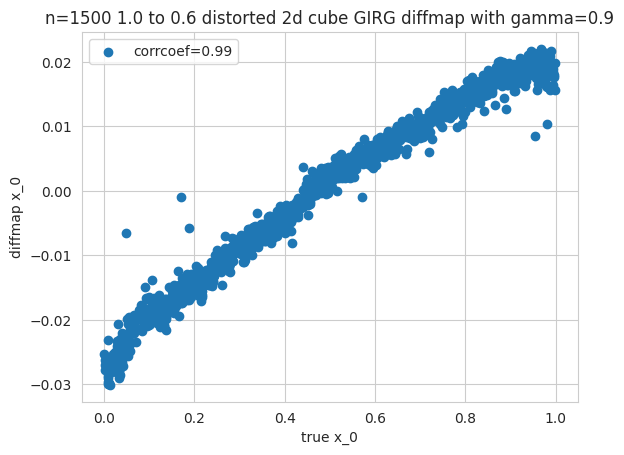

In [222]:
_ = plt.scatter(pts[:, 0], pts_dm[:, 0], label='corrcoef=0.99')
plt.title('n=1500 1.0 to 0.6 distorted 2d cube GIRG diffmap with gamma=0.9')
plt.xlabel('true x_0')
plt.ylabel('diffmap x_0')
plt.legend()
plt.show()

In [205]:
from sklearn.kernel_ridge import KernelRidge
krr = KernelRidge(alpha=1.0, kernel='rbf')
krr.fit(pts[:, 0].reshape(-1, 1), pts_dm[:, 0])

KernelRidge(alpha=1.0, kernel='rbf')

In [206]:
x = np.linspace(0, 1, 100)
y_k = krr.predict(x.reshape(-1, 1))
y = -0.023 * np.cos(x * np.pi)

Text(0.5, 1.0, 'n=1500 1.0 to 0.6 distorted 2d cube GIRG diffmap with gamma=0.9')

Text(0.5, 0, 'true x_0')

Text(0, 0.5, 'diffmap x_0')

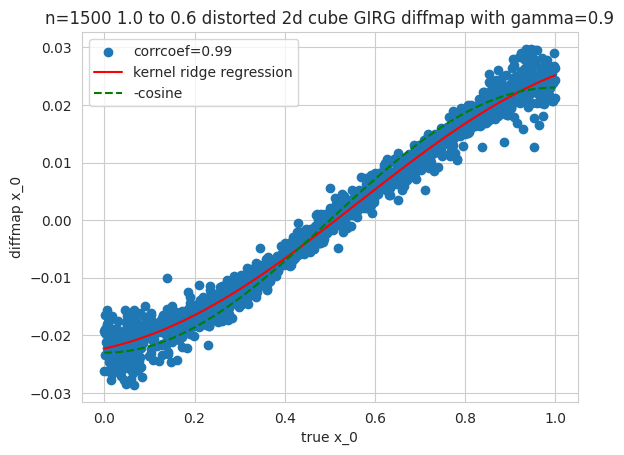

In [207]:
_ = plt.scatter(pts[:, 0], pts_dm[:, 0], label='corrcoef=0.99')
_ = plt.plot(x, y_k, label='kernel ridge regression', color='r')
_ = plt.plot(x, y, label='-cosine', color='g', ls='--')
plt.title('n=1500 1.0 to 0.6 distorted 2d cube GIRG diffmap with gamma=0.9')
plt.xlabel('true x_0')
plt.ylabel('diffmap x_0')
plt.legend()
plt.show()

In [208]:
np.corrcoef(pts[:, 1], pts_dm[:, 1])

array([[1.        , 0.95081143],
       [0.95081143, 1.        ]])

Text(0.5, 1.0, 'n=1500 1.0 to 0.6 distorted 2d cube GIRG diffmap with gamma=0.9')

Text(0.5, 0, 'true x_1')

Text(0, 0.5, 'diffmap x_1')

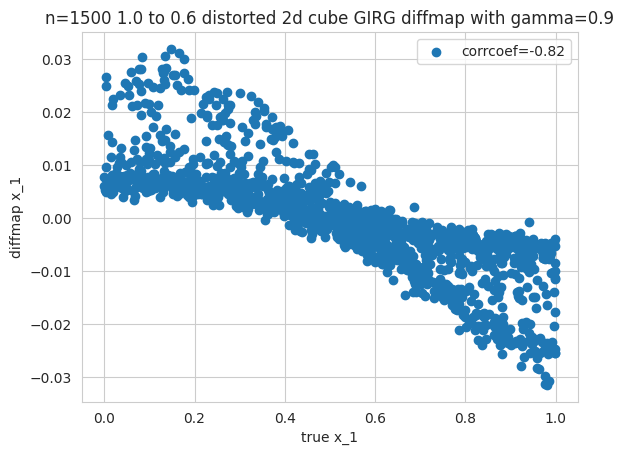

In [169]:
_ = plt.scatter(pts[:, 1], pts_dm[:, 1], label='corrcoef=-0.82')
plt.title('n=1500 1.0 to 0.6 distorted 2d cube GIRG diffmap with gamma=0.9')
plt.xlabel('true x_1')
plt.ylabel('diffmap x_1')
plt.legend()
plt.show()

In [47]:
import importlib
importlib.reload(mcmc)
from tests import test_mcmc

<module 'benji_girgs.mcmc' from '../benji_girgs/mcmc.py'>

In [48]:
const

0.07032075311965111

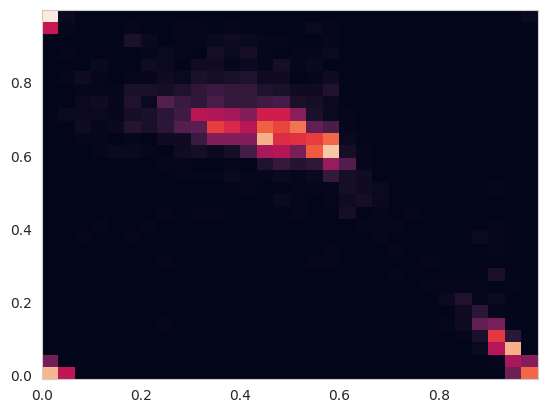

In [49]:
# g, A, weights, const, pts, MC = mcmc.g_initialised_mcmc(g, alpha=alpha, const=const, pts_d=2, diffmap_init=True, graph_name='socfb-Amherst41')

n = g.numberOfNodes()

gnx = nk.nxadapter.nk2nx(g)
A = nx.adjacency_matrix(gnx).todense()

weights = np.array(utils.graph_degrees_to_weights(g))

a, B, pts = utils.get_diffmap_and_points(g, process='restrict_uniform_edges')

# pts = points.PointsCube(pts[:, 0:2])
#
#
# ds=2
# outputs = []
# for k in range(0, ds):
#     output = utils.cubify_dim(pts, k=k, perc_near=0.1)
#     outputs.append(output)
# pts_cube = np.stack(outputs, axis=-1)
#
# pts_uniform = utils.uniformify_pts(pts)

pts = points.PointsCube(pts)

MC = mcmc.MCMC_girg(g, weights, alpha, const, pts.copy(), pool=True, graph_name='socfb-Amherst41', failure_prob=0.3, cl_mixin_prob=0.5)
_ = plt.hist2d(MC.pts[:, 0], MC.pts[:, 1], bins=30)


In [27]:
lls, outs, pecs = MC.ordered_pts_const_alpha_loop(5, 4, 4, 3)

100%|██████████| 2235/2235 [00:07<00:00, 301.22it/s]


{'loop': 0, 'll': -578619.1380001741, 'out': array([[  45766,  136142],
       [ 148048, 4665269]]), 'pec': 0.2515887151747037, 'alpha': 1.0369595828628406}


100%|██████████| 2235/2235 [00:07<00:00, 301.34it/s]


{'loop': 1, 'll': -564855.0005096048, 'out': array([[  48052,  133856],
       [ 135464, 4677853]]), 'pec': 0.26415550717945335, 'alpha': 1.0918864334270193}


100%|██████████| 2235/2235 [00:07<00:00, 300.45it/s]


{'loop': 2, 'll': -556453.9387224836, 'out': array([[  50524,  131384],
       [ 125634, 4687683]]), 'pec': 0.2777447940717286, 'alpha': 1.2046008316509733}


ValueError: too many values to unpack (expected 3)

In [44]:
%timeit ll, ene = MC.calculate_ll()

1.09 s ± 2.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [40]:
import multiprocessing

var_dict = {}

def calculate_ll(self, pool_size=5):
    """NB our iterative updating of self.ll is rather approximate, so would need to be
    recalculated from scratch periodically if we wanted to be more accurate"""
    # This is going to be double the actual LL as we double count edges
    ll = 0
    expected_num_edges = 0

    def get_u_ll_and_expected_num_edges(u_index):
        p_u_to_vs = self.get_p_u_to_vs(
            self.weights, self.pts, self.alpha, self.const_in,
            u_index, self.failure_prob, self.cl_mixin_prob,
            self.c_cl
        )
        expected_num_edges = p_u_to_vs.sum()
        expected_num_edges -= p_u_to_vs[u_index]
        u_ll = self.p_u_to_vs_to_ll(self.g, u_index, p_u_to_vs)
        return u_ll, expected_num_edges

    with multiprocessing.pool.ThreadPool(pool_size) as p:
        results = p.map(get_u_ll_and_expected_num_edges, range(self.n))

        for u_ll, u_expected_num_edges in results:
            ll += u_ll
            expected_num_edges += u_expected_num_edges
    return ll, expected_num_edges/2


def get_p_u_to_vs_and_expected_num_edges(u_index, alpha, const_in, failure_prob, cl_mixin_prob, c_cl):
    pts = np.frombuffer(var_dict['pts']).reshape(var_dict['pts_shape'])
    weights = np.frombuffer(var_dict['weights']).reshape(var_dict['weights_shape'])
    p_u_to_vs = mcmc.MCMC_girg.get_p_u_to_vs(
        weights, pts, alpha, const_in,
        u_index, failure_prob, cl_mixin_prob,
        c_cl
    )
    expected_num_edges = p_u_to_vs.sum()
    expected_num_edges -= p_u_to_vs[u_index]
    return p_u_to_vs, expected_num_edges
    # u_ll = mcmc.MCMC_girg.p_u_to_vs_to_ll(self.g, u_index, p_u_to_vs)
    # return u_ll, expected_num_edges

def calculate_ll2(self, pool_size=5):
    """NB our iterative updating of self.ll is rather approximate, so would need to be
    recalculated from scratch periodically if we wanted to be more accurate"""
    # This is going to be double the actual LL as we double count edges
    ll = 0
    expected_num_edges = 0


    with  multiprocessing.Pool(pool_size, initargs=(self.weights, self.pts))as p:
        results = p.map(get_u_ll_and_expected_num_edges, range(self.n))

        for u_ll, u_expected_num_edges in results:
            ll += u_ll
            expected_num_edges += u_expected_num_edges
    return ll, expected_num_edges/2



def init_calculate_ll(weights, pts):
    global var_dict
    # var_dict['weights'] = weights
    # var_dict['weights_shape'] = weights.shape
    var_dict['pts'] = pts
    var_dict['pts_shape'] = pts.shape


# a, b = calculate_ll(MC)

In [45]:
ll, ene = calculate_ll(MC, pool_size=5, thread_pool=False)

AttributeError: Can't pickle local object 'calculate_ll.<locals>.get_u_ll_and_expected_num_edges'

In [46]:
MC.shared_pts

<SynchronizedArray wrapper for <multiprocessing.sharedctypes.c_double_Array_4470 object at 0x2b4dc929a6c0>>

In [43]:
%timeit ll, ene = calculate_ll(MC, pool_size=10)

822 ms ± 5.79 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [35]:
a, b = calculate_ll(MC, thread_pool=False)

AttributeError: Can't pickle local object 'calculate_ll.<locals>.get_u_ll_and_expected_num_edges'

In [33]:
ll, ene

(-556453.9387224836, 89647.08422506791)

In [19]:
df = pd.DataFrame({'lls': lls, 'outs': outs, 'pecs': pecs})
df

,lls,outs,pecs
0,-556394.022702,"[[49486, 132422], [133152, 4680165]]",0.272039
1,-537596.786776,"[[55324, 126584], [125856, 4687461]]",0.304132
2,-529573.100220,"[[58168, 123740], [122670, 4690647]]",0.319766
3,-525682.442667,"[[60452, 121456], [121170, 4692147]]",0.332322


<AxesSubplot: ylabel='lls'>

<AxesSubplot: ylabel='pecs'>

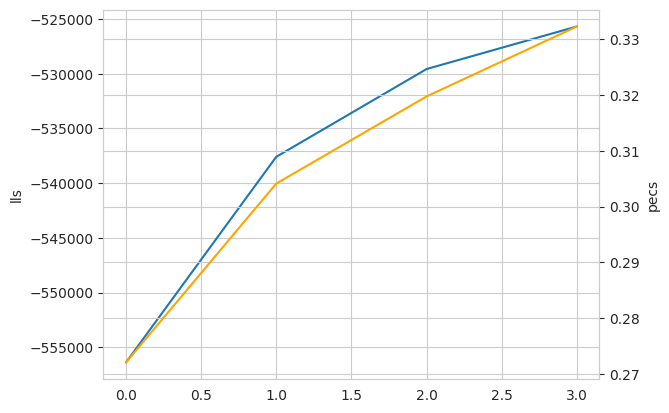

In [24]:
import seaborn as sns
fig, ax = plt.subplots(1, 1)
sns.lineplot(df.lls, ax=ax)
ax2 = ax.twinx()
sns.lineplot(df.pecs, ax=ax2, color='orange')

In [ ]:
df.add_

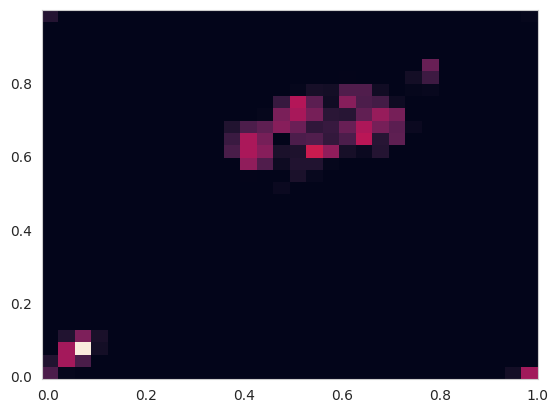

In [17]:
_ = plt.hist2d(MC.pts[:, 0], MC.pts[:, 1], bins=30)

In [13]:
self = MC
num_proposals = 8
alpha_proposals = np.concatenate(
    [np.random.uniform(1, self.alpha, size=num_proposals//2),
     [self.alpha],
     np.random.uniform(self.alpha, self.alpha + 2*(self.alpha - 1), size=num_proposals//2)]
)
lls = []
alpha_proposals = sorted(alpha_proposals)
for alpha in alpha_proposals:
    self.alpha = alpha
    ll, _ = self.calculate_ll()
    print(f'alpha: {alpha}, ll: {ll}')
    lls.append(ll)

self.alpha = alpha_proposals[np.argmax(lls)]

alpha: 1.0083557498294538, ll: -624348.4397040668
alpha: 1.0150477065440429, ll: -624420.2996143482
alpha: 1.0219212270343507, ll: -624500.8325831554
alpha: 1.0309817499952487, ll: -624616.1024837678
alpha: 1.0856658184902461, ll: -625488.1211192268
alpha: 1.1076412831580433, ll: -625919.3895866383
alpha: 1.1776103037804286, ll: -627572.6319461702
alpha: 1.1866905103198722, ll: -627813.3521648363
alpha: 1.2281469771216111, ll: -628999.5110437472


In [17]:
MC.alpha = 1.0
ll, _ = MC.calculate_ll()
print(ll)

MC.alpha = 0.9
ll, _ = MC.calculate_ll()
print(ll)

MC.alpha = 0.8
ll, _ = MC.calculate_ll()
print(ll)

MC.alpha = 0.6
ll, _ = MC.calculate_ll()
print(ll)

-624267.0392973562
-623979.7897790299
-625154.268112206
-632717.4428460642


## Testing self.do_ordered_thing

In [12]:
MC.ll
MC.outs
MC.percent_edges_captureds

-625472.7101095241

[(array([[  36096,  145812],
         [ 156082, 4657235]]),
  0)]

[(0.19842997559205752, 0)]

In [13]:
MC.ordered_point_propose_compare_update(num_proposals=40)

100%|██████████| 2235/2235 [00:48<00:00, 46.31it/s]


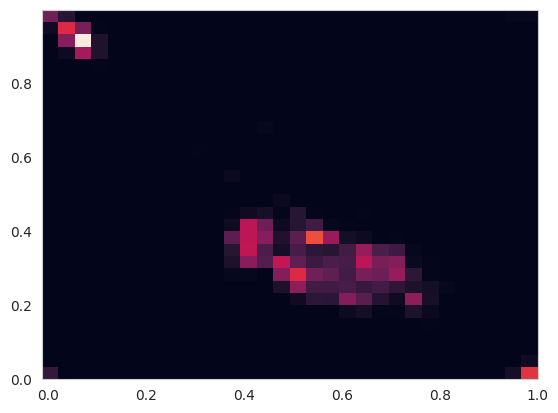

In [14]:
_ = plt.hist2d(MC.pts[:, 0], MC.pts[:, 1], bins=30)

In [15]:
for _ in range(4):
    MC.ll, MC.expected_num_edges = MC.calculate_ll()
    # print(f'const: {self.const}, expected_num_edges: {self.expected_num_edges}')
    MC.calibrate_const()

MC.calculate_ll()
g_out, A_out, out, percent_edges_captured, percent_fake_edges_wrong = MC.get_CM(MC.A)

out
percent_edges_captured

../benji_girgs/generation.py:153: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(wuwv, dists**d)


(-545958.0103851196, 92688.32379208515)

../benji_girgs/generation.py:140: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)
../benji_girgs/generation.py:630: RuntimeWarning: divide by zero encountered in divide
  puv = np.stack([np.ones(original_edge_dists.shape), const_in * ((wu * wv / W) / original_edge_dists ** d) ** alpha]).min(axis=0)
../benji_girgs/generation.py:631: RuntimeWarning: divide by zero encountered in divide
  puv_cube = np.stack([np.ones(cube_edge_dists.shape), const_in * ((wu * wv / W) / cube_edge_dists ** d) ** alpha]).min(axis=0)


array([[  52730,  129178],
       [ 136256, 4677061]])

0.2898718033291554

In [18]:
alpha = MC.alpha
alpha
eps=1e-4
MC.alpha = alpha + eps
ll_plus, _ = MC.calculate_ll()
MC.alpha = alpha - eps
ll_minus, _ = MC.calculate_ll()

1.0856658184902461

In [19]:
ll_plus, ll_minus

(-545955.0263905183, -545960.9973261111)

In [24]:
- ((ll_plus / ll_minus) / eps) / MC.ll  # roughly d_ll / d_alpha as a percentage of of ll


0.018327747550048498

In [48]:
MC.ordered_point_propose_compare_update(num_proposals=50)

100%|██████████| 2235/2235 [00:57<00:00, 38.63it/s]


In [29]:
np.concatenate([np.random.uniform(0, 0.2, 5), np.random.uniform(0.8, 1, 5)])

array([0.09287581, 0.13046281, 0.1695502 , 0.05733743, 0.10171454,
       0.85998258, 0.90252456, 0.8586037 , 0.91672127, 0.80271716])

In [26]:
1/1.08

0.9259259259259258

In [49]:
for _ in range(4):
    MC.ll, MC.expected_num_edges = MC.calculate_ll()
    # print(f'const: {self.const}, expected_num_edges: {self.expected_num_edges}')
    MC.calibrate_const()

MC.calculate_ll()
g_out, A_out, out, percent_edges_captured, percent_fake_edges_wrong = MC.get_CM(MC.A)

out
percent_edges_captured

(-527161.4120656077, 91637.44843256484)

array([[  57334,  124574],
       [ 128324, 4684993]])

0.31518130043758386

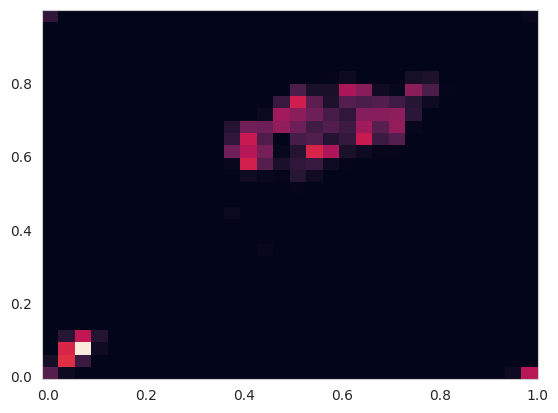

In [50]:
_ = plt.hist2d(MC.pts[:, 0], MC.pts[:, 1], bins=30)

In [53]:
alpha = MC.alpha
alpha
MC.calculate_ll()

1.0856658184902461

In [56]:
import jax.numpy as jnp
from jax import grad, jit, vmap

grad(jnp.tanh)(2.0)

2023-07-23 15:21:09.995787: E external/xla/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


Array(0.07065082, dtype=float32, weak_type=True)

In [ ]:
self = MC

        ll = 0
        expected_num_edges = 0
        for u_index in range(self.n):
            p_u_to_vs = self.get_p_u_to_vs(
                self.weights, self.pts, self.alpha, self.const_in,
                u_index, self.failure_prob, self.cl_mixin_prob,
                self.c_cl
            )

            expected_num_edges += p_u_to_vs.sum()
            expected_num_edges -= p_u_to_vs[u_index]

            u_ll = self.p_u_to_vs_to_ll(self.g, u_index, p_u_to_vs)
            ll += u_ll

In [28]:
MC.calculate_ll()

(-562327.4695308732, 91409.5339540561)

In [15]:
MC.calculate_ll()

(-560323.394060164, 102317.93893390158)

In [29]:
g_out, A_out, out, percent_edges_captured, percent_fake_edges_wrong = MC.get_CM(MC.A)

../benji_girgs/generation.py:140: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)
../benji_girgs/generation.py:630: RuntimeWarning: divide by zero encountered in divide
  puv = np.stack([np.ones(original_edge_dists.shape), const_in * ((wu * wv / W) / original_edge_dists ** d) ** alpha]).min(axis=0)
../benji_girgs/generation.py:631: RuntimeWarning: divide by zero encountered in divide
  puv_cube = np.stack([np.ones(cube_edge_dists.shape), const_in * ((wu * wv / W) / cube_edge_dists ** d) ** alpha]).min(axis=0)


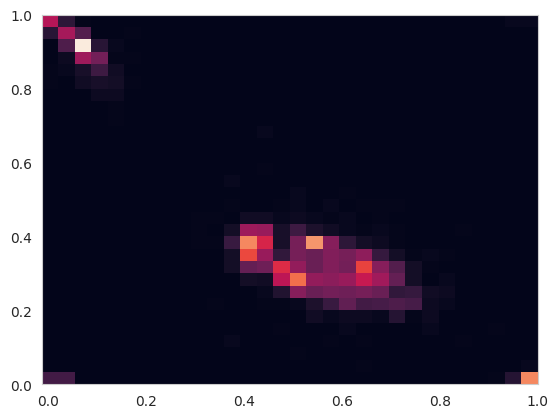

In [19]:
_ = plt.hist2d(MC.pts[:, 0], MC.pts[:, 1], bins=30)

In [23]:
foo = MC.pts == pts
np.all(foo, axis=1).sum()

PointsCube(44)

In [ ]:
%matplotlib notebook
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.ion()
fig.show()
fig.canvas.draw()

100%|██████████| 15000/15000 [00:14<00:00, 1003.95it/s]


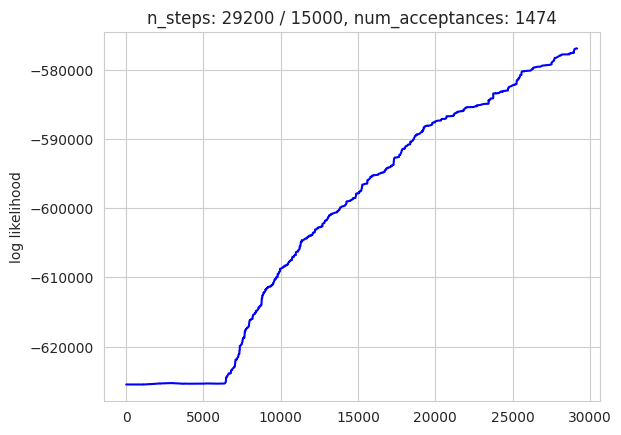

In [38]:
MC.run(15000, pool_size=5, jobs_per_worker=5, plot_every=400)

In [40]:
MC.run(15000, pool_size=None, jobs_per_worker=5, plot_every=400)

100%|██████████| 15000/15000 [00:07<00:00, 2028.01it/s]


In [17]:
MC.run_pool(5000, pool_size=15, jobs_per_worker=25, plot_every=400)

5250it [00:27, 191.01it/s]                          


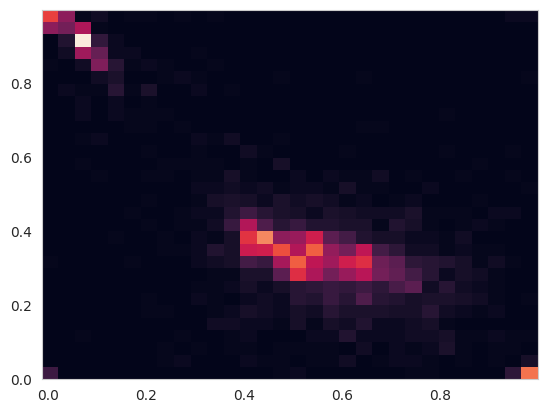

In [39]:
%matplotlib inline
_ = plt.hist2d(MC.pts[:, 0], MC.pts[:, 1], bins=30)

In [21]:
pts[0] == MC.pts[0]

PointsCube([ True,  True])

In [23]:
changed_i = np.array([i for i in range(len(pts)) if not np.all(pts[i] == MC.pts[i])])

(array([202.,   4.,   8.,   6.,   6.,   3.,   8.,   7.,   6.,   3.,   1.,
          6.,   2.,   5.,   4.,   0.,   2.,   5.,   1.,   4.,   1.,   2.,
          0.,   4.,   1.,   3.,   1.,   2.,   2.,   2.]),
 array([8.18057604e-06, 3.28003177e-02, 6.55924548e-02, 9.83845919e-02,
        1.31176729e-01, 1.63968866e-01, 1.96761003e-01, 2.29553140e-01,
        2.62345278e-01, 2.95137415e-01, 3.27929552e-01, 3.60721689e-01,
        3.93513826e-01, 4.26305963e-01, 4.59098100e-01, 4.91890237e-01,
        5.24682375e-01, 5.57474512e-01, 5.90266649e-01, 6.23058786e-01,
        6.55850923e-01, 6.88643060e-01, 7.21435197e-01, 7.54227334e-01,
        7.87019471e-01, 8.19811609e-01, 8.52603746e-01, 8.85395883e-01,
        9.18188020e-01, 9.50980157e-01, 9.83772294e-01]),
 <BarContainer object of 30 artists>)

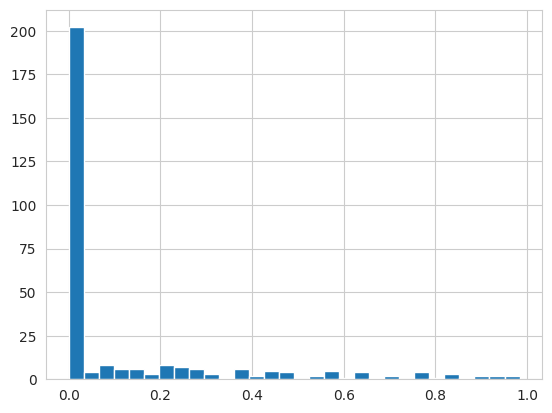

In [32]:
plt.hist(np.abs(pts[changed_i] - MC.pts[changed_i]).max(axis=1), bins=30)

In [12]:
MC.pts[0]
points.PointsCube([0.51, 0.39])

PointsCube([0.51621419, 0.38421158])

PointsCube([0.51, 0.39])

In [17]:
np.outer(MC.weights, MC.weights)

array([[0.0034358 , 0.01085714, 0.0265244 , ..., 0.01278119, 0.00742133,
        0.00137432],
       [0.01085714, 0.03430855, 0.08381709, ..., 0.04038855, 0.02345142,
        0.00434285],
       [0.0265244 , 0.08381709, 0.20476834, ..., 0.09867076, 0.0572927 ,
        0.01060976],
       ...,
       [0.01278119, 0.04038855, 0.09867076, ..., 0.04754601, 0.02760736,
        0.00511247],
       [0.00742133, 0.02345142, 0.0572927 , ..., 0.02760736, 0.01603008,
        0.00296853],
       [0.00137432, 0.00434285, 0.01060976, ..., 0.00511247, 0.00296853,
        0.00054973]])

In [41]:
np.triu(np.minimum(1, np.outer(MC.weights, MC.weights) * MC.c_cl), 1).sum()

90954.00000000007

In [14]:
MC.probs_cl

array([[0.00343829, 0.010865  , 0.02654362, ..., 0.01279045, 0.00742671,
        0.00137532],
       [0.010865  , 0.03433341, 0.08387783, ..., 0.04041781, 0.02346841,
        0.004346  ],
       [0.02654362, 0.08387783, 0.20491672, ..., 0.09874225, 0.05733421,
        0.01061745],
       ...,
       [0.01279045, 0.04041781, 0.09874225, ..., 0.04758046, 0.02762737,
        0.00511618],
       [0.00742671, 0.02346841, 0.05733421, ..., 0.02762737, 0.0160417 ,
        0.00297068],
       [0.00137532, 0.004346  , 0.01061745, ..., 0.00511618, 0.00297068,
        0.00055013]])

In [39]:
np.triu(MC.probs_cl, 1).sum()

90954.00000000007

In [40]:
nk.overview(MC.g)

Network Properties:
nodes, edges			2235, 90954
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.036433
clustering coefficient		0.310386
min/max/avg degree		1, 467, 81.390604
degree assortativity		0.058704
number of connected components	1
size of largest component	2235 (100.00 %)


In [19]:
import importlib
importlib.reload(mcmc)

<module 'benji_girgs.mcmc' from '../benji_girgs/mcmc.py'>

In [21]:
eps=1e-7
a = generation.get_probs_u(weights, pts, alpha, const_in, u_index)
a *= (1 - failure_prob)
a_cl = np.minimum(1, c_cl * weights[u_index] * weights)
a = (1 - cl_mixin) * a + cl_mixin * a_cl
a = np.clip(a, eps, 1 - eps)

In [22]:
a

array([0.35171915, 0.05275349, 0.04615846, ..., 0.00667446, 0.00390859,
       0.00069385])

In [23]:
p_u_to_vs

array([0.35171915, 0.05275349, 0.04615846, ..., 0.00667446, 0.00390859,
       0.00069385])

In [24]:
p_u_to_vs2

array([0.35171915, 0.03551387, 0.05574137, ..., 0.00666268, 0.00390039,
       0.00069398])

## Test1
We propose a new x_u2 far out from the original x_u. We expect it to yield lower log likelihood, but so far it seems to actually increase LL weirdly

It's also noteworthy that many of x_u's direct neighbours aren't even that close in the diffusion map to x_u :((. At least they're all in the original cluster not in the further away cluster.

In [27]:
u_index = 3

g, weights, alpha, const_in, pts, x_u2 = MC.g, MC.weights, MC.alpha, MC.const_in, MC.pts, points.PointsCube([0.8, 0.8])
failure_prob, cl_mixin, c_cl = MC.failure_prob, MC.cl_mixin_prob, MC.c_cl

print(MC.pts[u_index], x_u2)


p_u_to_vs = mcmc.MCMC_girg.get_p_u_to_vs(weights, pts, alpha, const_in, u_index, failure_prob, cl_mixin, c_cl)

x_u = pts[u_index].copy()
pts[u_index] = x_u2
p_u_to_vs2 = mcmc.MCMC_girg.get_p_u_to_vs(weights, pts, alpha, const_in, u_index, failure_prob, cl_mixin, c_cl)
pts[u_index] = x_u

u_ll_old = mcmc.MCMC_girg.p_u_to_vs_to_ll(g, u_index, p_u_to_vs)
u_ll_new = mcmc.MCMC_girg.p_u_to_vs_to_ll(g, u_index, p_u_to_vs2)


u_ll_old
u_ll_new

mask = np.ones(len(pts), dtype=bool)
for nhb in g.iterNeighbors(u_index):
    mask[nhb] = False

print(f'nhbs: {len(list(g.iterNeighbors(u_index)))}')

mask2 = mask.copy()
mask2[u_index] = False

[0.48316907 0.32581158] [0.8 0.8]


-336.291636917007

-397.7159319905469

nhbs: 99


(0.0, 1.0)

(0.0, 1.0)

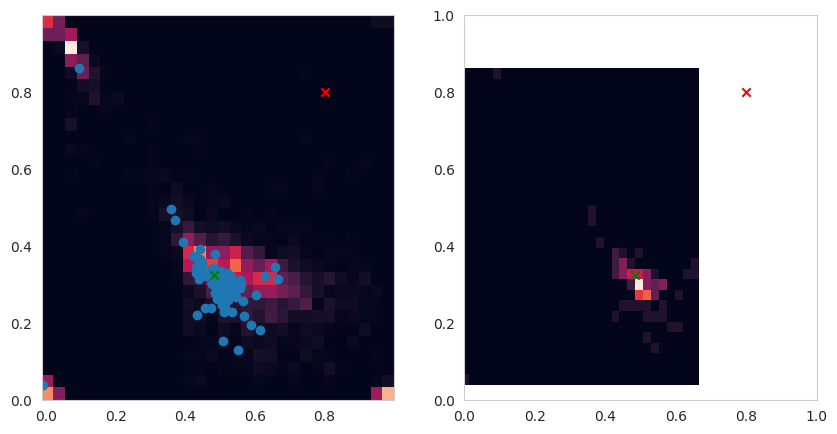

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
_ = ax[0].hist2d(MC.pts[:, 0], MC.pts[:, 1], bins=30)
_ =  ax[0].scatter(MC.pts[~mask, 0], MC.pts[~mask, 1])
_ =  ax[0].scatter(MC.pts[u_index, 0], MC.pts[u_index, 1], color='g', marker='x')
_ = ax[0].scatter(x_u2[0], x_u2[1], color='r', marker='x')


_ = ax[1].hist2d(MC.pts[~mask, 0], MC.pts[~mask, 1], bins=30)
_ =  ax[1].scatter(MC.pts[u_index, 0], MC.pts[u_index, 1], color='g', marker='x')
_ = ax[1].scatter(x_u2[0], x_u2[1], color='r', marker='x')
plt.xlim(0, 1)
plt.ylim(0, 1)


We see that the new x_u2 has decently worse ll on edges, but this is made up for by its ll on non-edges which is improved. So it still seems like we're getting punished too much from non-edges?

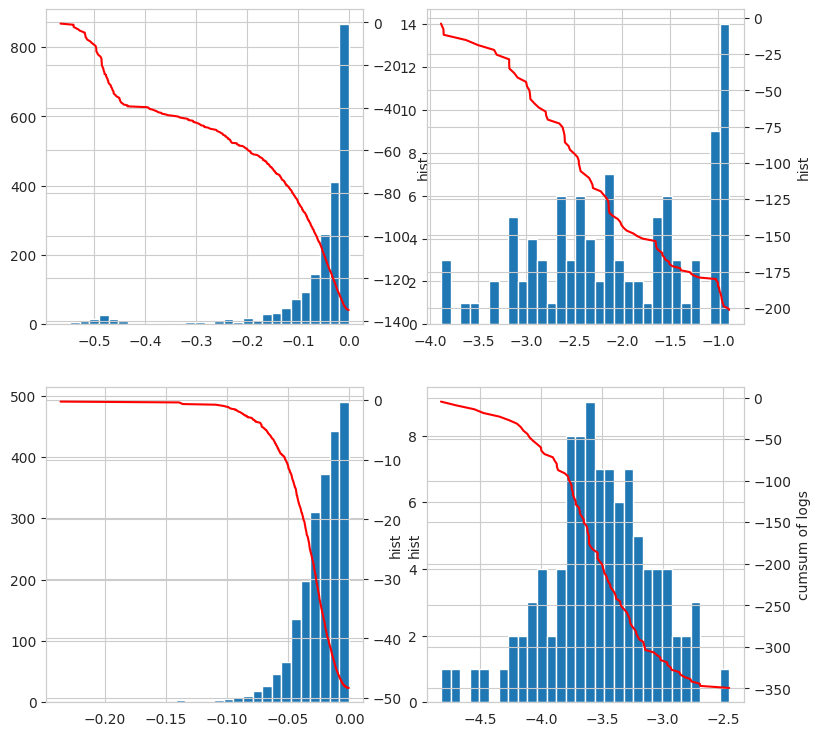

In [29]:
def quick_cumsum_plot(arr, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1)
    arr = sorted(arr)
    ax.hist(arr, bins=30)
    plt.ylabel('hist')
    ax2 = ax.twinx()
    ax2.plot(arr, np.cumsum(arr), color='r')
    plt.ylabel('cumsum of logs')

fig, ax = plt.subplots(2, 2, figsize=(9, 9))
# first row
quick_cumsum_plot(np.log(1 - p_u_to_vs[mask2]), ax[0][0])
quick_cumsum_plot(np.log(p_u_to_vs[~mask]), ax[0][1])
# second row
quick_cumsum_plot(np.log(1 - p_u_to_vs2[mask2]), ax[1][0])
quick_cumsum_plot(np.log(p_u_to_vs2[~mask]), ax[1][1])


Actually for u_index=1 which has more edges, there's much less of an issue! That's good :)

## Test 2
We will try to repeat the above but with a whole range of proposals for x_u2 and observe their new lls

In [57]:
u_index = 0

g, weights, alpha, const_in, pts = MC.g, MC.weights, MC.alpha, MC.const_in, MC.pts
failure_prob, cl_mixin, c_cl = MC.failure_prob, MC.cl_mixin_prob, MC.c_cl

x_u2s = mcmc.MCMC_girg.proposal(10, 2, sigma=0.1, x_u = MC.pts[u_index], p_normal=0.7)


for x_u2 in x_u2s:
    ap, u_ll_old, u_ll_new, p_u_to_vs, p_u_to_vs = mcmc.MCMC_girg.acceptance_prob(g, weights, alpha, const_in, pts, u_index, x_u2, failure_prob=failure_prob, cl_mixin=cl_mixin, c_cl=c_cl)


PointsCube([[0.42522603, 0.41904816],
            [0.60098233, 0.18838111],
            [0.56296563, 0.35786928],
            [0.52145672, 0.4408645 ],
            [0.55831744, 0.41566654],
            [0.52309066, 0.37278111],
            [0.37454914, 0.27648248],
            [0.49548042, 0.49143167],
            [0.48034908, 0.2894207 ],
            [0.44207858, 0.37581536]])

In [ ]:
u_index = 0

g, weights, alpha, const_in, pts, x_u2 = MC.g, MC.weights, MC.alpha, MC.const_in, MC.pts, points.PointsCube([0.8, 0.8])
failure_prob, cl_mixin, c_cl = MC.failure_prob, MC.cl_mixin_prob, MC.c_cl

x_u2s

print(MC.pts[u_index], x_u2)


p_u_to_vs = mcmc.MCMC_girg.get_p_u_to_vs(weights, pts, alpha, const_in, u_index, failure_prob, cl_mixin, c_cl)

x_u = pts[u_index].copy()
pts[u_index] = x_u2
p_u_to_vs2 = mcmc.MCMC_girg.get_p_u_to_vs(weights, pts, alpha, const_in, u_index, failure_prob, cl_mixin, c_cl)
pts[u_index] = x_u

u_ll_old = mcmc.MCMC_girg.p_u_to_vs_to_ll(g, u_index, p_u_to_vs)
u_ll_new = mcmc.MCMC_girg.p_u_to_vs_to_ll(g, u_index, p_u_to_vs2)


u_ll_old
u_ll_new

mask = np.ones(len(pts), dtype=bool)
for nhb in g.iterNeighbors(u_index):
    mask[nhb] = False

print(f'nhbs: {len(list(g.iterNeighbors(u_index)))}')

mask2 = mask.copy()
mask2[u_index] = False

In [59]:
MC.cl_mixin_prob

0.5

In [33]:
outs[:, None].shape
all_pts.shape

(42, 1)

(42, 2)

In [42]:
np.concatenate([outs[:, None], all_pts], axis=1)

array([[-6.20107706e+02,  2.69194032e-01,  8.36811886e-01],
       [-5.50512791e+02,  4.81532702e-01,  4.34165608e-01],
       [-5.47260102e+02,  4.88533246e-01,  4.34717258e-01],
       [-5.50241255e+02,  4.86659914e-01,  4.38291233e-01],
       [-6.02902447e+02,  4.66420004e-01,  5.43093507e-01],
       [-5.47202934e+02,  4.87282494e-01,  4.33819716e-01],
       [-5.46646952e+02,  4.83962202e-01,  4.29519027e-01],
       [-5.47352449e+02,  4.88293152e-01,  4.34809722e-01],
       [-5.49057687e+02,  4.82039180e-01,  4.31669057e-01],
       [-5.49266646e+02,  4.84341684e-01,  4.34925106e-01],
       [-6.21593005e+02,  5.64652164e-01,  9.50177980e-01],
       [-5.49618932e+02,  4.80719043e-01,  4.31395147e-01],
       [-5.50603587e+02,  4.82477217e-01,  4.35402982e-01],
       [-5.48811060e+02,  4.81244868e-01,  4.30149335e-01],
       [-6.27032916e+02,  8.15659614e-02,  9.87018402e-01],
       [-5.31680351e+02,  5.27888360e-01,  3.67422283e-01],
       [-5.49130454e+02,  4.84617526e-01

In [37]:
best_out

15

In [43]:
best_pt
x_u
mean_pos

array([0.52788836, 0.36742228])

PointsCube([0.48461753, 0.43476417])

PointsCube([0.52788836, 0.36742228])

193

[0.13537095 0.13168452]


(15, 2)

../benji_girgs/generation.py:153: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(wuwv, dists**d)


(array([[62., 32.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0., 23., 45.],
        [27.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  2., 23., 24.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  1.,  0.,  2.,  0.,  5.,  1.,  1.,  0.,  3.,
         28., 81., 33.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  4., 23.,
         20.,  5.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  7.,  5.,  7.,
          2.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0

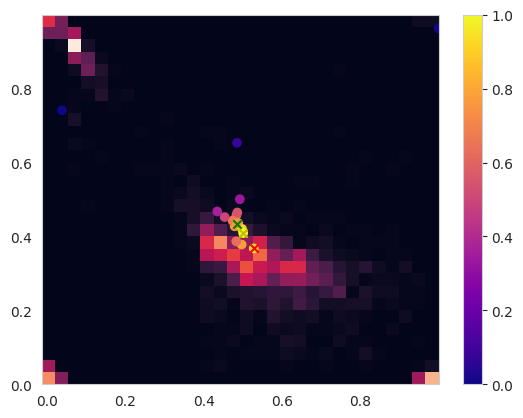

In [44]:
self = MC

# u_index = np.argsort(-MC.weights)[1000]
u_index=2
nhbs = list(MC.g.iterNeighbors(u_index))
len(nhbs)


x_u = self.pts[u_index]

nhbs = list(self.g.iterNeighbors(u_index))
mean_pos = self.pts[nhbs].mean(axis=0)
pos_std = self.pts[nhbs].std(axis=0)
print(pos_std)
x_u2s = self.proposal(15, 2, np.array([0.03, 0.03]), x_u, 0.7)
# x_u2s = self.proposal(40, 2, pos_std, x_u, 0.7)
x_u2s.shape

outs = [self.acceptance_prob(u_index, x_u2)[2] for x_u2 in x_u2s]
outs.append(self.acceptance_prob(u_index, mean_pos)[2])
outs.append(self.acceptance_prob(u_index, x_u)[2])
outs = np.array(outs)
best_out = np.argmax(outs)  # u_ll_new

all_pts = np.concatenate([x_u2s, mean_pos[None, :], x_u[None, :]])
best_pt = all_pts[best_out]

cm = (outs - outs.min())/(outs.max() - outs.min())


plt.hist2d(MC.pts[:, 0], MC.pts[:, 1], bins=30)

plt.scatter(all_pts[:, 0], all_pts[:, 1], c=cm, cmap='plasma')
plt.colorbar()

plt.scatter(x_u[0], x_u[1], marker='x', color='g')
plt.scatter(mean_pos[0], mean_pos[1], marker='x', color='r')
plt.scatter(best_pt[0], best_pt[1], marker='x', color='y')

In [45]:
np.concatenate([outs[:, None], all_pts], axis=1)

array([[-5.64385144e+02,  4.83784049e-01,  4.57424167e-01],
       [-5.48182306e+02,  4.88281654e-01,  4.35916078e-01],
       [-5.49177617e+02,  4.79292002e-01,  4.27417795e-01],
       [-5.69422142e+02,  4.85992361e-01,  4.64557589e-01],
       [-5.47131988e+02,  4.97108142e-01,  3.77846429e-01],
       [-6.15601803e+02,  4.85217497e-01,  6.52937269e-01],
       [-6.21976659e+02,  9.99950140e-01,  9.62243959e-01],
       [-5.61190153e+02,  4.83286533e-01,  3.86508550e-01],
       [-5.57447316e+02,  4.73821165e-01,  4.42457779e-01],
       [-5.32735013e+02,  4.98052134e-01,  4.20041826e-01],
       [-5.90542836e+02,  4.92539319e-01,  5.00444448e-01],
       [-5.87267126e+02,  4.34810948e-01,  4.67413416e-01],
       [-5.74643154e+02,  4.53757752e-01,  4.52264444e-01],
       [-6.23129738e+02,  3.86117851e-02,  7.41034184e-01],
       [-5.25337144e+02,  5.00943345e-01,  4.08901330e-01],
       [-5.31680351e+02,  5.27888360e-01,  3.67422283e-01],
       [-5.49130454e+02,  4.84617526e-01

In [47]:
 np.concatenate([x_u2s, mean_pos[None, :], x_u[None, :]]).shape
 np.concatenate([x_u2s,[mean_pos, x_u]]).shape

(17, 2)

(17, 2)

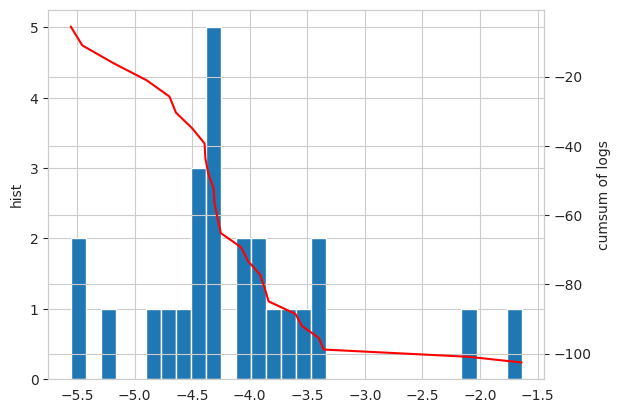

In [55]:
quick_cumsum_plot(np.log(p_u_to_vs[~mask]))

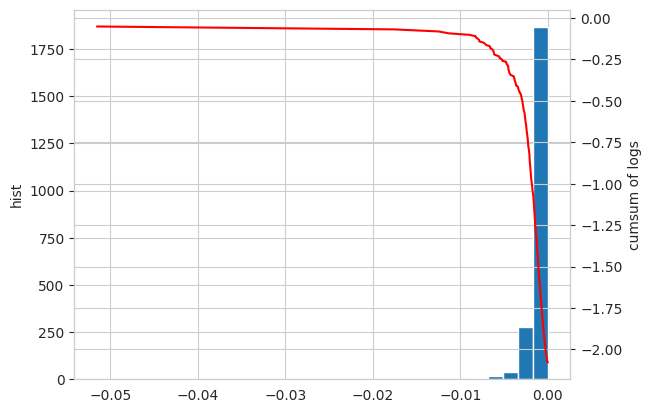

In [94]:
quick_cumsum_plot(np.log(1 - p_u_to_vs2[mask2]))

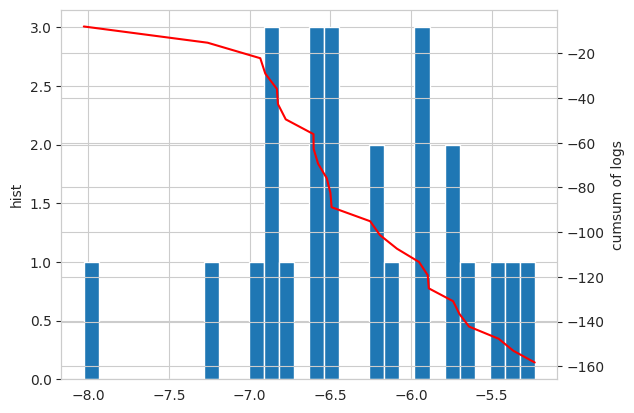

In [95]:
quick_cumsum_plot(np.log(p_u_to_vs2[~mask]))

In [59]:
np.argsort(-MC.weights)[50]

1439

In [67]:
u_index = np.argsort(-MC.weights)[0]
nhbs = list(MC.g.iterNeighbors(u_index))
len(nhbs)


467

In [68]:
MC.pts[nhbs].mean(axis=0)

PointsCube([0.54051297, 0.63469221])

In [69]:
MC.pts[nhbs].std(axis=0).mean()

PointsCube(0.18597578)

77

[0.21092029 0.1962717 ]


(40, 2)

../benji_girgs/generation.py:149: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(wuwv, dists**d)


(array([[37., 32.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0., 31., 62.],
        [35., 34.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0., 10., 84., 42.,  9.,  0.,  1.,  1.,  5.,  0.,  1.,  1.,  1.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  4., 12., 27.,  8.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,
          0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  2.,  7.,  4.,  7.,  1.,  0.,  0.,  0.,  1.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0

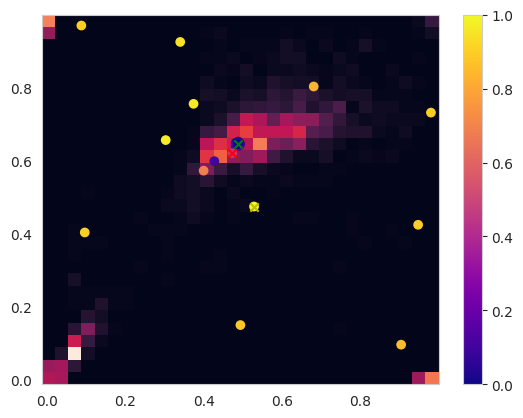

In [45]:
self = MC

u_index = np.argsort(-MC.weights)[1000]
nhbs = list(MC.g.iterNeighbors(u_index))
len(nhbs)


x_u = self.pts[u_index]

nhbs = list(self.g.iterNeighbors(u_index))
mean_pos = self.pts[nhbs].mean(axis=0)
pos_std = self.pts[nhbs].std(axis=0)
print(pos_std)
x_u2s = self.proposal(40, 2, np.array([0.003, 0.003]), x_u, 0.7)
# x_u2s = self.proposal(40, 2, pos_std, x_u, 0.7)
x_u2s.shape

outs = [self.acceptance_prob(u_index, x_u2)[2] for x_u2 in x_u2s]
outs.append(self.acceptance_prob(u_index, mean_pos)[2])
outs.append(self.acceptance_prob(u_index, x_u)[2])
outs = np.array(outs)
best_out = np.argmax(outs)  # u_ll_new

all_pts = np.concatenate([x_u2s, mean_pos[None, :], x_u[None, :]])
best_pt = all_pts[best_out]

cm = (outs - outs.min())/(outs.max() - outs.min())


plt.hist2d(MC.pts[:, 0], MC.pts[:, 1], bins=30)

plt.scatter(all_pts[:, 0], all_pts[:, 1], c=cm, cmap='plasma')
plt.colorbar()

plt.scatter(x_u[0], x_u[1], marker='x', color='g')
plt.scatter(mean_pos[0], mean_pos[1], marker='x', color='r')
plt.scatter(best_pt[0], best_pt[1], marker='x', color='y')

In [114]:
x_u2s

PointsCube([[0.49138811, 0.64763343],
            [0.49392576, 0.64557465],
            [0.48831097, 0.64584525],
            [0.4889519 , 0.64326464],
            [0.489373  , 0.63891071],
            [0.48603139, 0.64924275],
            [0.48903734, 0.64882759],
            [0.48716189, 0.64075264],
            [0.48425336, 0.64789512],
            [0.16158277, 0.52027428],
            [0.48362121, 0.64456754],
            [0.49157931, 0.64819097],
            [0.47864009, 0.64629751],
            [0.48879303, 0.64508293],
            [0.33840025, 0.52582676],
            [0.48059239, 0.65020405],
            [0.48672791, 0.6452966 ],
            [0.48341093, 0.64342153],
            [0.77949566, 0.64799934],
            [0.48268661, 0.64921323],
            [0.7689087 , 0.6575932 ],
            [0.97709775, 0.04788162],
            [0.46381869, 0.0914628 ],
            [0.4865117 , 0.64637134],
            [0.48721327, 0.64146581],
            [0.48616979, 0.64768068],
            

In [115]:
outs

array([-1494.8926422 , -1515.42360503, -1521.92410561, -1424.63855706,
       -1310.79031401, -1512.99061559, -1472.87061756, -1372.36084144,
       -1559.62438181,  -484.11135137, -1502.16810523, -1505.0844695 ,
       -1529.22738446, -1492.23540039,  -534.37270516, -1532.05541118,
       -1558.65074946, -1476.5535532 ,  -444.48675838, -1508.71571583,
        -484.45551115,  -573.39018784,  -539.7083726 , -1536.82426964,
       -1389.23452499, -1531.76222104, -1400.37004383,  -880.75261615,
        -444.62690678, -1526.89693223, -1505.85049395, -1440.09756344,
       -1481.69168617, -1517.0780644 , -1494.14495057, -1532.35449614,
       -1487.18023082, -1554.01614638, -1448.96286751, -1523.21185384,
       -1038.95404366, -1544.68882089])

In [111]:
x_u + np.random.normal(size=(10, 2), scale=np.array([0.01, 0.01]))

PointsCube([[0.48817478, 0.63440462],
            [0.4970686 , 0.64853921],
            [0.49235914, 0.64027612],
            [0.49975836, 0.6275649 ],
            [0.49236832, 0.6547839 ],
            [0.48293372, 0.64095201],
            [0.48223368, 0.64208041],
            [0.48480033, 0.643197  ],
            [0.48468565, 0.63552744],
            [0.48974865, 0.64482929]])

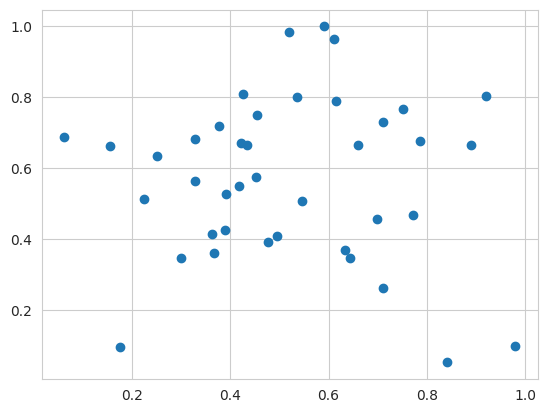

In [108]:
plt.scatter(x_u2s[:, 0], x_u2s[:, 1])

(array([[37., 32.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0., 31., 62.],
        [35., 34.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0., 10., 84., 42.,  9.,  0.,  1.,  1.,  5.,  0.,  1.,  1.,  1.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  4., 12., 27.,  8.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,
          0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  2.,  7.,  4.,  7.,  1.,  0.,  0.,  0.,  1.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0

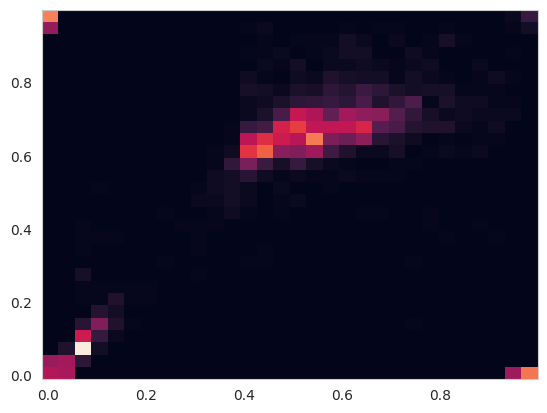

In [101]:
plt.hist2d(MC.pts[:, 0], MC.pts[:, 1], bins=30)

In [100]:
outs

array([ -480.45290586,  -508.16333949,  -472.13585788,  -487.09907314,
        -492.4406383 ,  -486.79685929,  -423.9672776 ,  -690.02796228,
        -476.75158482,  -522.32531554,  -781.59442293, -1551.08333232,
       -1490.05616469, -1484.41497709,  -394.66945374,  -426.45829165,
       -1256.90532449,  -505.40941953, -1538.43917778,  -537.06691461,
       -1038.95404366, -1544.68882089])

In [74]:
pos_std

PointsCube([0.29893128, 0.19099005])

NameError: name 'best_pt' is not defined

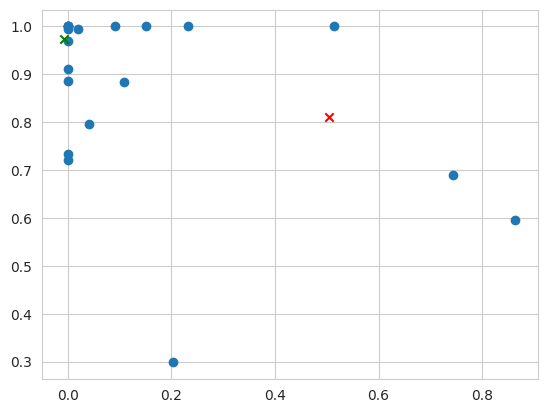

In [92]:
plt.scatter(x_u2s[:, 0], x_u2s[:, 1])
plt.scatter(x_u[0], x_u[1], marker='x', color='g')
plt.scatter(mean_pos[0], mean_pos[1], marker='x', color='r')
plt.scatter(best_pt[0], best_pt[1], marker='x', color='y')

In [39]:
pos_std
np.random.normal(size=(5, 2), scale=pos_std) + x_u

PointsCube([0.15122216, 0.13714166])

PointsCube([[0.65178188, 0.44446657],
            [0.51166764, 0.41337997],
            [0.54110539, 0.27317014],
            [0.53532001, 0.28917202],
            [0.58230031, 0.27547353]])

In [40]:
k = 5
d = 2
sigma = pos_std
p_normal = 0.7
uniforms = np.random.uniform(size=(k, d))
normals = np.clip(x_u + np.random.normal(size=(k, d), scale=sigma), 0, 1)
mask = np.random.binomial(1, p_normal, k)

In [50]:
mask[:, None] * normals

PointsCube([[0.47771356, 0.15621724],
            [0.58416299, 0.31725487],
            [0.        , 0.        ],
            [0.        , 0.        ],
            [0.63261534, 0.49556824]])

In [43]:
normals.shpae

AttributeError: 'PointsCube' object has no attribute 'shpae'

In [ ]:

self = MC
g_out, A_out, out, percent_edges_captured, percent_fake_edges_wrong = self.get_CM(self.A)
out
percent_edges_captured

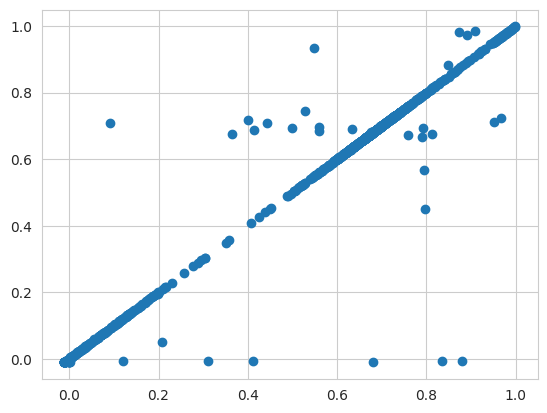

In [27]:
plt.scatter(MC.pts[:, 0], pts[:, 0])

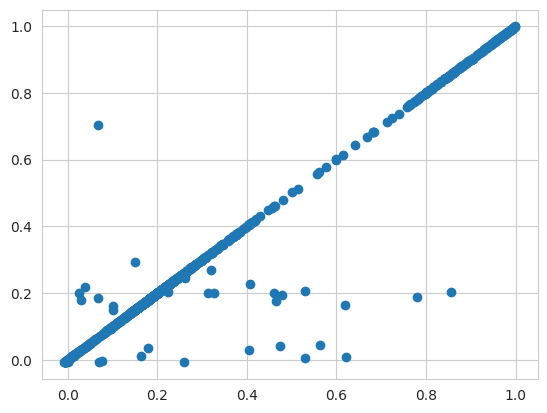

In [28]:
plt.scatter(MC.pts[:, 1], pts[:, 1])

In [23]:
g_dm, A_dm = MC.MC_to_g_A()
np.set_printoptions(formatter={'int_kind': '{:,}'.format})

nk.overview(g_dm)


Network Properties:
nodes, edges			962, 19832
directed?			False
weighted?			False
isolated nodes			48
self-loops			0
density				0.042904
clustering coefficient		0.285824
min/max/avg degree		0, 241, 41.230769
degree assortativity		0.182952
number of connected components	52
size of largest component	908 (94.39 %)


In [12]:
nk.overview(g)

Network Properties:
nodes, edges			962, 18812
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.040697
clustering coefficient		0.318360
min/max/avg degree		1, 313, 39.110187
degree assortativity		0.024395
number of connected components	1
size of largest component	962 (100.00 %)


In [13]:
g_dm, A_dm = MC.MC_to_g_A()

out, percent_edges_captured, percent_fake_edges_wrong = mcmc.CM(A, A_dm)
print(out)
print(percent_edges_captured)
print(percent_fake_edges_wrong)
print()


[[6,480 31,144]
 [33,084 854,736]]
0.1722304911758452
0.8362147406733395



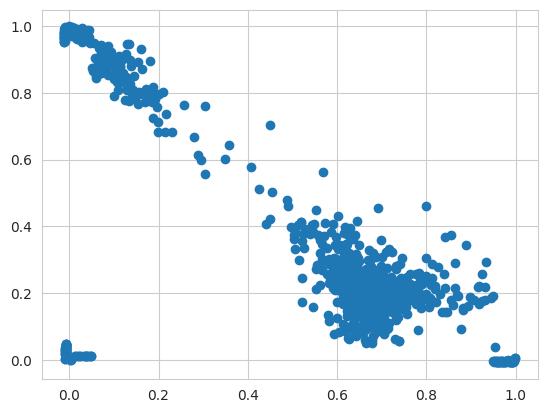

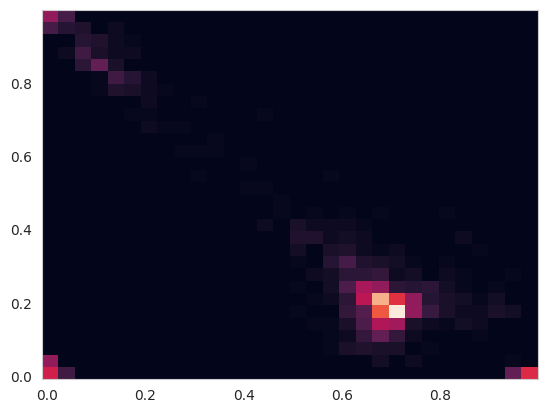

In [14]:
%matplotlib inline
# a = MC.pts[:, 0]
# plt.hist(a[a<0.04], bins=50)

plt.scatter(MC.pts[:, 0], MC.pts[:, 1])
plt.figure()
_ = plt.hist2d(MC.pts[:, 0], MC.pts[:, 1], bins=30)

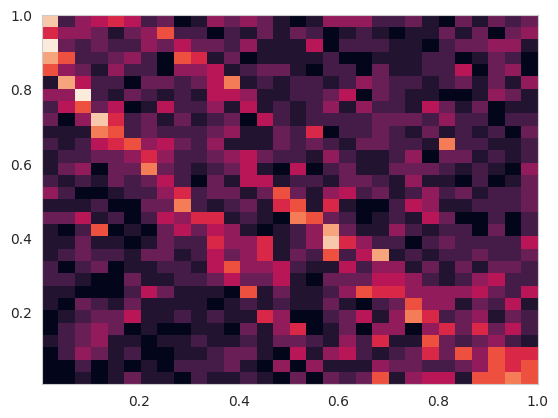

In [18]:
_ = plt.hist2d(pts_cube[:, 0], pts_cube[:, 1], bins=30)

In [24]:
%matplotlib notebook
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.ion()
fig.show()
fig.canvas.draw()

<IPython.core.display.Javascript object>

In [25]:
MC.run_pool(1000, pool_size=15, jobs_per_worker=25, plot_every=200)

1125it [00:04, 273.72it/s]                          


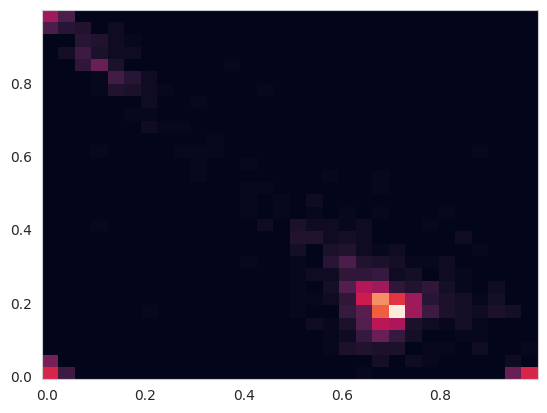

In [26]:
%matplotlib inline

_ = plt.hist2d(MC.pts[:, 0], MC.pts[:, 1], bins=30)

In [29]:
MC.outs

[(array([[16,006, 21,618],
         [123,436, 764,384]]),
  0),
 (array([[6,456, 31,168],
         [31,642, 856,178]]),
  375),
 (array([[6,154, 31,470],
         [31,036, 856,784]]),
  750),
 (array([[6,340, 31,284],
         [30,726, 857,094]]),
  1125)]

In [30]:
self = MC
g_out, A_out, out, percent_edges_captured, percent_fake_edges_wrong = self.get_CM(self.A)
print(out)
print(percent_edges_captured)

[[6,182 31,442]
 [30,672 857,148]]
0.16431001488411653


In [38]:
MC.plot_ll(MC.num_steps, CM=True)

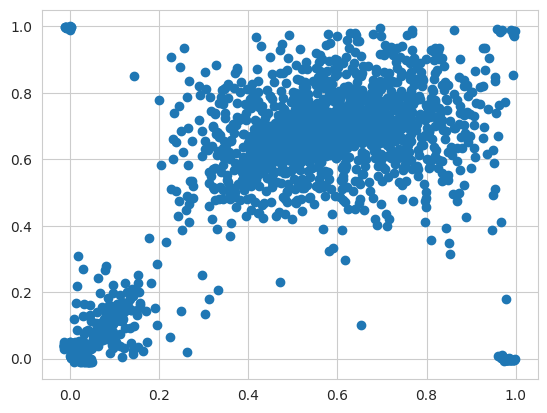

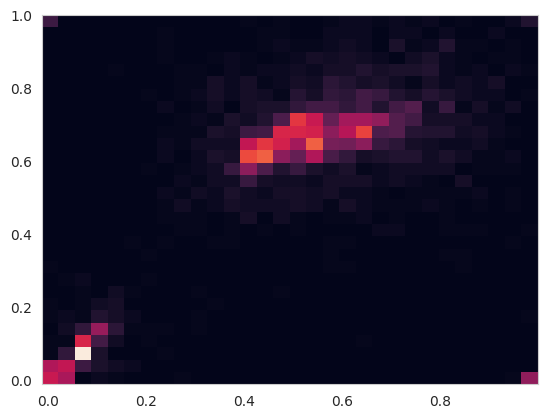

In [21]:
%matplotlib inline
# a = MC.pts[:, 0]
# plt.hist(a[a<0.04], bins=50)

plt.scatter(MC.pts[:, 0], MC.pts[:, 1])
plt.figure()
_ = plt.hist2d(MC.pts[:, 0], MC.pts[:, 1], bins=30)

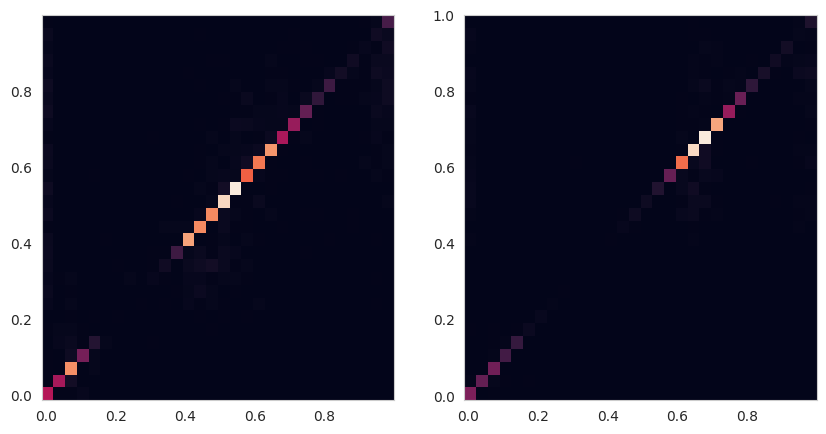

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
_ = ax[0].hist2d(pts[:, 0], MC.pts[:, 0], bins=30)
_ = ax[1].hist2d(pts[:, 1], MC.pts[:, 1], bins=30)

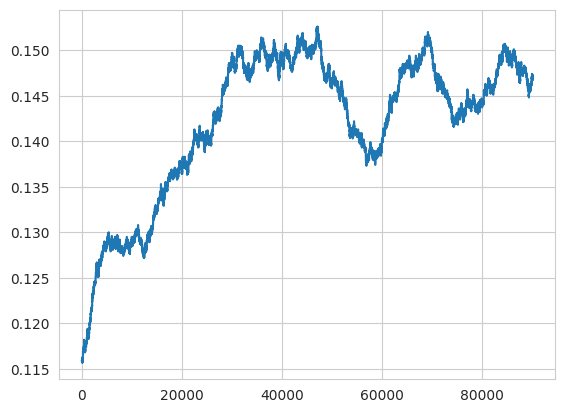

In [23]:
%matplotlib inline
MC.acceptances_plot(convolve_width=10000)

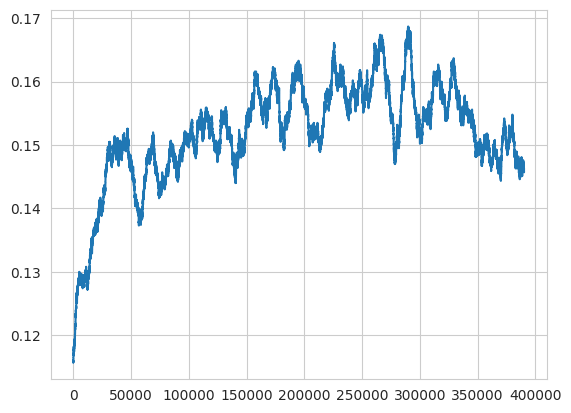

In [26]:
%matplotlib inline
MC.acceptances_plot(convolve_width=10000)

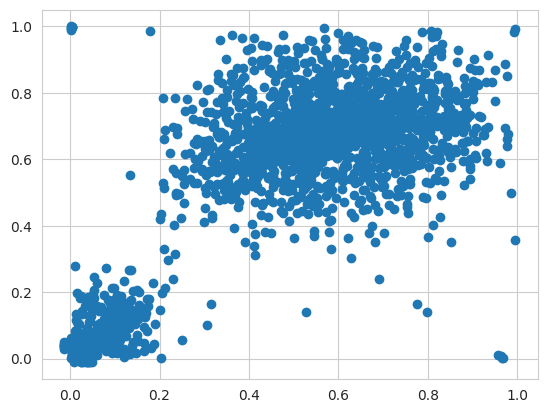

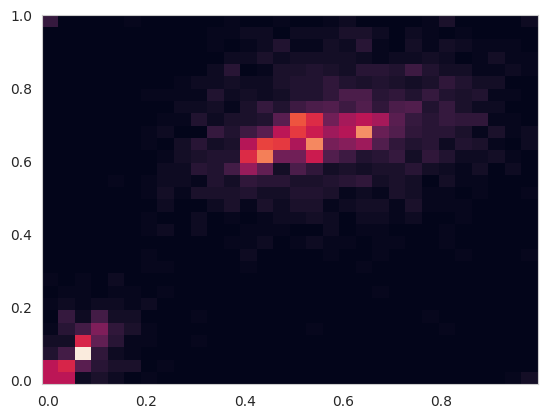

In [27]:
%matplotlib inline
# a = MC.pts[:, 0]
# plt.hist(a[a<0.04], bins=50)

plt.scatter(MC.pts[:, 0], MC.pts[:, 1])
plt.figure()
_ = plt.hist2d(MC.pts[:, 0], MC.pts[:, 1], bins=30)

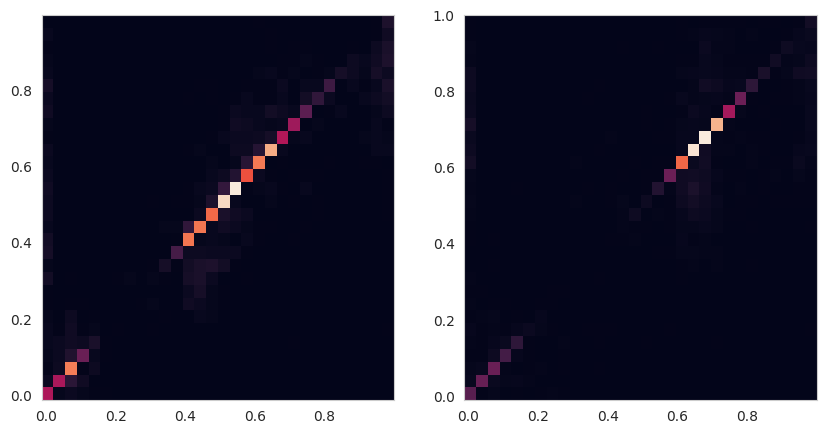

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
_ = ax[0].hist2d(pts[:, 0], MC.pts[:, 0], bins=30)
_ = ax[1].hist2d(pts[:, 1], MC.pts[:, 1], bins=30)

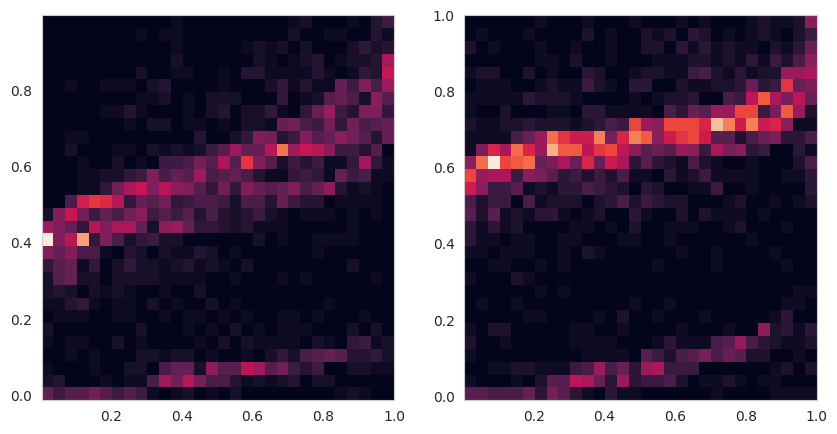

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
_ = ax[0].hist2d(pts_cube[:, 0], MC.pts[:, 0], bins=30)
_ = ax[1].hist2d(pts_cube[:, 1], MC.pts[:, 1], bins=30)

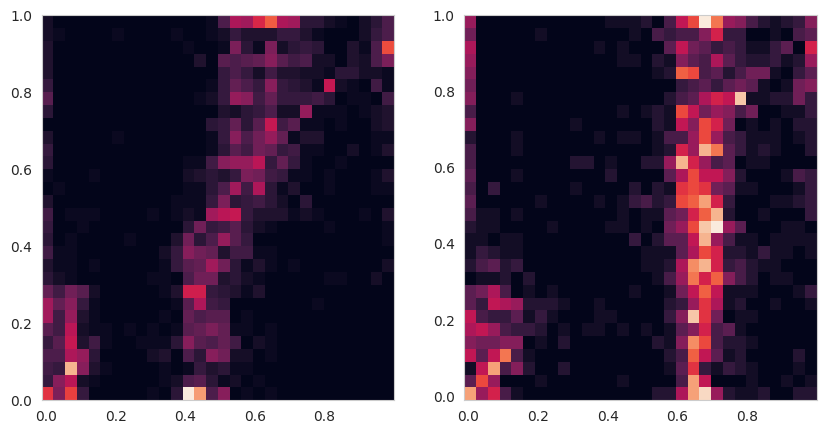

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
_ = ax[0].hist2d(pts[:, 0], MC.pts[:, 0], bins=30)
_ = ax[1].hist2d(pts[:, 1], MC.pts[:, 1], bins=30)

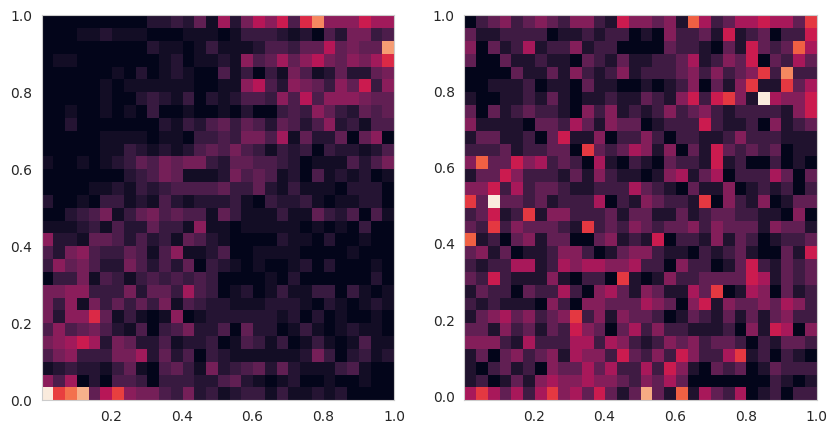

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
_ = ax[0].hist2d(pts_cube[:, 0], MC.pts[:, 0], bins=30)
_ = ax[1].hist2d(pts_cube[:, 1], MC.pts[:, 1], bins=30)

In [18]:
os.environ['DATA_PATH'] = '../../MCMC_testing/'

In [33]:
os.environ['DATA_PATH']

'../../MCMC_testing/'

In [34]:
os.getcwd()

'/cluster/home/bdayan/girgs/benji_src/notebooks'

(array([[ 9.,  6.,  4.,  6.,  4.,  6.,  5.,  3.,  4.,  4.,  2.,  8.,  2.,
          2.,  9.,  2.,  5.,  7.,  5.,  4.,  3.,  7.,  5.,  3.,  2.,  2.,
          5.,  7.,  2.,  9.],
        [ 4.,  6.,  4.,  3.,  4.,  4.,  5.,  2.,  5.,  2.,  5.,  5.,  2.,
          1.,  1.,  0.,  0.,  2.,  1.,  1.,  0.,  0.,  1.,  2.,  1.,  0.,
          0.,  0.,  3.,  2.],
        [ 6.,  7.,  5.,  7.,  2.,  4.,  6.,  7.,  1.,  2.,  1.,  1.,  2.,
          2.,  0.,  1.,  2.,  0.,  0.,  1.,  3.,  2.,  1.,  0.,  2.,  1.,
          2.,  2.,  1.,  5.],
        [ 7.,  2.,  3.,  4.,  2.,  6.,  5.,  1.,  4.,  2.,  4.,  3.,  5.,
          3.,  7.,  1.,  1.,  1.,  3.,  1.,  1.,  1.,  1.,  3.,  2.,  2.,
          5.,  1.,  4.,  2.],
        [ 7.,  1.,  5.,  3.,  2.,  3.,  4.,  5.,  1.,  3.,  1.,  1.,  1.,
          1.,  1.,  2.,  2.,  3.,  2.,  2.,  1.,  3.,  3.,  2.,  1.,  0.,
          1.,  2.,  2.,  2.],
        [ 5.,  4.,  2.,  7.,  4.,  3.,  3.,  4.,  3.,  3.,  2.,  3.,  1.,
          2.,  1.,  1.,  0.,  1.,  1

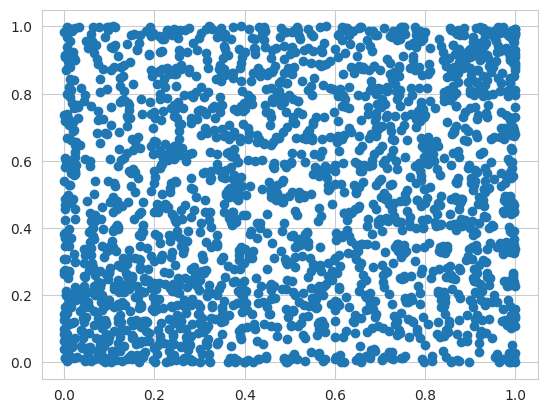

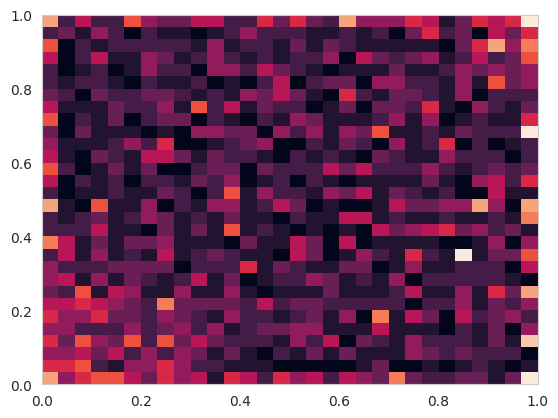

In [61]:
%matplotlib inline
# a = MC.pts[:, 0]
# plt.hist(a[a<0.04], bins=50)

plt.scatter(MC.pts[:, 0], MC.pts[:, 1])
plt.figure()
plt.hist2d(MC.pts[:, 0], MC.pts[:, 1], bins=30)

In [29]:
MC.expected_num_edges

60594.809209926796

In [62]:
g_dm, A_dm = test_mcmc.MC_to_g_A(MC)

out, percent_edges_captured, percent_fake_edges_wrong = mcmc.CM(A, A_dm)
print(out)
print(percent_edges_captured)
print(percent_fake_edges_wrong)


[[42,628 139,280]
 [137,490 4,675,827]]
0.23433823691096597
0.7633329261928291


In [25]:
nk.overview(g_dm)
nk.overview(g)
nk.overview(g_init)

Network Properties:
nodes, edges			1500, 456007
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.405610
clustering coefficient		0.650004
min/max/avg degree		145, 1499, 608.009333
degree assortativity		-0.104838
number of connected components	1
size of largest component	1500 (100.00 %)
Network Properties:
nodes, edges			1500, 60881
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.054153
clustering coefficient		0.526791
min/max/avg degree		9, 1317, 81.174667
degree assortativity		-0.171705
number of connected components	1
size of largest component	1500 (100.00 %)
Network Properties:
nodes, edges			1500, 517006
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.459867
clustering coefficient		0.686715
min/max/avg degree		156, 1499, 689.341333
degree assortativity		-0.118490
number of connected components	1
size of largest component	1500 (100.00 %)


In [34]:
g_dm, A_dm = test_mcmc.MC_to_g_A(MC)
# g_init, A_init = test_mcmc.MC_to_g_A(MC_init)

nk.overview(g_dm)
nk.overview(g_init)

CM = test_mcmc.quick_acc(A, A_dm)
CM
test_mcmc.quick_summarise_CM(CM)
print('============')
CM = test_mcmc.quick_acc(A, A_init)
CM
test_mcmc.quick_summarise_CM(CM)
':)'

const_in: 0.3975894770262727
Network Properties:
nodes, edges			3745, 134811
directed?			False
weighted?			False
isolated nodes			15
self-loops			0
density				0.019229
clustering coefficient		0.302392
min/max/avg degree		0, 553, 71.995194
degree assortativity		0.107403
number of connected components	16
size of largest component	3730 (99.60 %)
Network Properties:
nodes, edges			3745, 129178
directed?			False
weighted?			False
isolated nodes			10
self-loops			0
density				0.018426
clustering coefficient		0.330564
min/max/avg degree		0, 567, 68.986916
degree assortativity		0.002647
number of connected components	11
size of largest component	3735 (99.73 %)


array([[0.0015478 , 0.01013146],
       [0.01767655, 0.97064419]])

array([[0.13252585, 0.86747415],
       [0.01788543, 0.98211457]])

array([[7.47378347e-04, 1.09318878e-02],
       [1.76736940e-02, 9.70647040e-01]])

array([[0.06399189, 0.93600811],
       [0.01788255, 0.98211745]])

':)'

In [ ]:
MC.plot_ll(MC.num_steps)

In [26]:
MC.calculate_ll()

-1202958.4914603485

In [102]:
MC.ll_steps

[0,
 0,
 1,
 2,
 4,
 5,
 6,
 7,
 12,
 13,
 15,
 16,
 17,
 18,
 23,
 24,
 26,
 27,
 28,
 29,
 31,
 32,
 34,
 36,
 39,
 44,
 45,
 49,
 55,
 57,
 58,
 61,
 67,
 73,
 74,
 78,
 80,
 81,
 82,
 83,
 84,
 86,
 87,
 89,
 91,
 92,
 93,
 94,
 97,
 98,
 99,
 101,
 107,
 112,
 114,
 115,
 116,
 122,
 123,
 124,
 125,
 131,
 134,
 135,
 136,
 137,
 139,
 140,
 142,
 143,
 144,
 145,
 155,
 156,
 157,
 158,
 160,
 161,
 162,
 167,
 168,
 169,
 170,
 172,
 175,
 176,
 177,
 179,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 189,
 190,
 194,
 195,
 198,
 202,
 203,
 204,
 205,
 208,
 211,
 212,
 214,
 215,
 217,
 218,
 219,
 221,
 222,
 226,
 227,
 228,
 229,
 230,
 231,
 233,
 234,
 236,
 237,
 241,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 250,
 253,
 256,
 257,
 259,
 263,
 264,
 266,
 267,
 273,
 275,
 276,
 277,
 280,
 285,
 286,
 288,
 289,
 290,
 291,
 297,
 300,
 301,
 302,
 303,
 305,
 307,
 308,
 311,
 312,
 315,
 316,
 319,
 320,
 325,
 326,
 331,
 333,
 340,
 342,
 344,
 345,
 346,
 347,
 34

In [68]:
import pickle
with open('temp.pkl', 'wb') as file:
    pickle.dump(MC, file)

TypeError: gs() missing 1 required positional argument: 'self'

In [67]:
import multiprocessing
import ctypes

def gs(self):
    state = self.__dict__.copy()
    del state['shared_pts']
    del state['shared_pts_init']

def ss(self, state):
    self.__dict__.update(state)
    if self.pool:
        self.shared_pts = multiprocessing.Array(ctypes.c_double, self.pts.flatten())
        self.pts = self.pts_type(np.frombuffer(self.shared_pts.get_obj()).reshape(self.pts.shape))
        self.shared_pts_init = multiprocessing.Array(ctypes.c_double, self.pts_init.flatten())
        self.pts_init = self.pts_type(np.frombuffer(self.shared_pts_init.get_obj()).reshape(self.pts_init.shape))

MC.__getstate__ = gs
MC.__setstate__ = ss

In [81]:
MC.calculate_ll()

-1197406.9692224392

In [77]:
MC.calculate_ll()

-1199493.5638940108

In [44]:
def mcmc_girg_init_worker(pts, pts_shape, pts_init, weights, g):
    mp_var_dict = mcmc.mp_var_dict
    mp_var_dict['pts'] = pts
    mp_var_dict['pts_shape'] = pts_shape
    # mp_var_dict['pts_init'] = None
    if 'pts_init' in mp_var_dict:
        del(mp_var_dict['pts_init'])
    mp_var_dict['weights'] = weights
    mp_var_dict['g'] = g

mcmc.mcmc_girg_init_worker = mcmc_girg_init_worker

In [43]:
foo = {'a': 1}
del(foo['b'])

KeyError: 'b'

In [ ]:

u_index = 100
sigma, p_normal=None, None
if sigma is None:
    sigma = 2 * ((1/n)**1/d)
if p_normal is None:
    p_normal = 0.7

x_u_init = MC.pts_init[u_index]
x_u2 = mcmc.MCMC_girg.proposal(1, d, sigma=sigma, x_u=x_u_init, p_normal=p_normal).squeeze()

def prior_x_u(pt):
    out = p_normal * np.sqrt(1/(2*np.pi) * np.exp(-np.linalg.norm(pt - x_u_init)**2 / (2 * sigma**(2*d))))
    + (1 - p_normal)
    return out
acceptance_prob, u_ll_old, u_ll_new, p_u_to_vs_old, p_u_to_vs_new = mcmc.MCMC_girg.acceptance_prob_static(MC.g, weights, alpha, MC.const_in, MC.pts,
                                                                                    u_index, x_u2, prior_x_u)

In [36]:
x_u2
x_u_init

PointsCube([0.06785322, 0.98485106])

PointsCube([0.06993552, 0.98693336])

In [38]:
prior_x_u(x_u_init)
prior_x_u(x_u2)

0.2792595962810029

0.01796251693731934

In [39]:
pts = MC.pts
eps = 1e-7
p_u_to_vs = generation.get_probs_u(weights, MC.pts, alpha, MC.const_in, u_index)
p_u_to_vs = np.clip(p_u_to_vs, eps, 1 - eps)

x_u = pts[u_index].copy()
pts[u_index] = x_u2
p_u_to_vs2 = generation.get_probs_u(weights, MC.pts, alpha, MC.const_in, u_index)
pts[u_index] = x_u
p_u_to_vs2 = np.clip(p_u_to_vs2, eps, 1 - eps)

u_ll_old = mcmc.MCMC_girg.p_u_to_vs_to_ll(g, u_index, p_u_to_vs)
u_ll_new = mcmc.MCMC_girg.p_u_to_vs_to_ll(g, u_index, p_u_to_vs2)

In [41]:
u_ll_old
u_ll_new

-28842.560305343573

-29101.628442570873

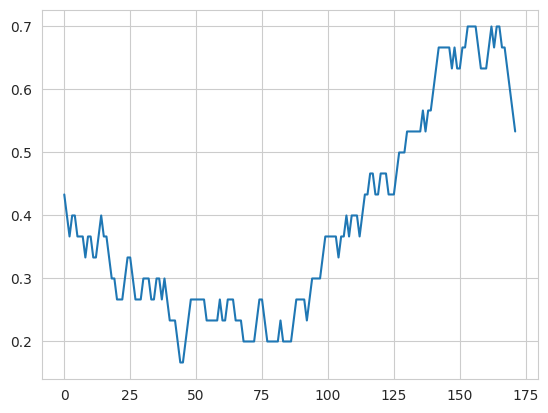

In [37]:
%matplotlib inline
MC.acceptances_plot(convolve_width=30)

In [48]:
g_dm, A_dm = test_mcmc.MC_to_g_A(MC)
CM = test_mcmc.quick_acc(A, A_dm)
CM
test_mcmc.quick_summarise_CM(CM)
print('============')
CM = test_mcmc.quick_acc(A, A_init)
CM
test_mcmc.quick_summarise_CM(CM)
':)'

const_in: 7.903612372398382e-06


array([[0.00569284, 0.02764484],
       [0.02499793, 0.9416644 ]])

array([[0.17076292, 0.82923708],
       [0.02586004, 0.97413996]])

array([[0.00325768, 0.03008   ],
       [0.04177225, 0.92489007]])

array([[0.09771763, 0.90228237],
       [0.04321286, 0.95678714]])

':)'

(0.05, 0.12)

(0.8, 1.0)

<Figure size 640x480 with 0 Axes>

(0.06, 0.08)

(0.875, 1.0)

<Figure size 640x480 with 0 Axes>

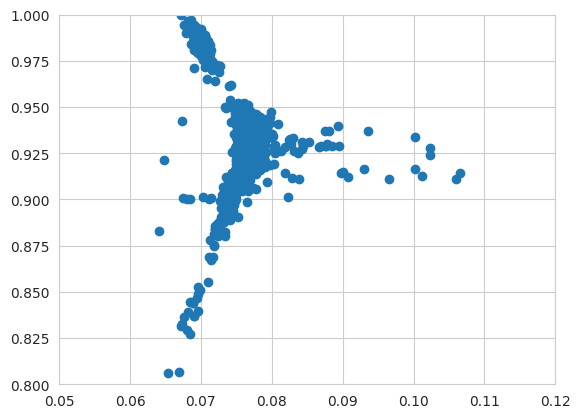

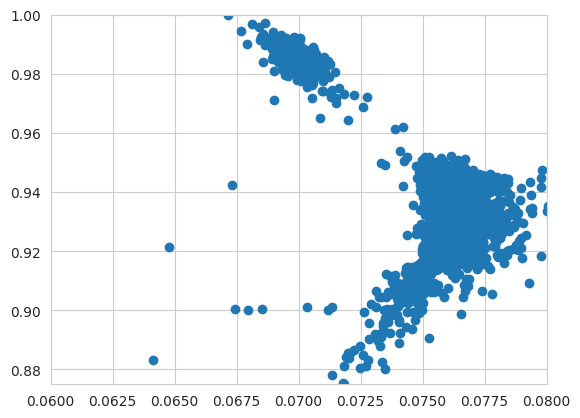

<Figure size 640x480 with 0 Axes>

In [51]:
%matplotlib inline
plt.scatter(MC.pts[:, 0], MC.pts[:, 1])
plt.xlim([0.05, 0.12])
plt.ylim([0.8, 1.0])
plt.figure()

plt.scatter(MC.pts[:, 0], MC.pts[:, 1])
plt.xlim([0.06, 0.08])
plt.ylim([0.875, 1.0])
plt.figure()

# plt.hist2d(MC.pts[:, 0], MC.pts[:, 1], bins=1000)
# plt.xlim([0.06, 0.09])
# plt.ylim([0.0, 0.2])

(array([277., 194., 210., 217., 244., 223., 230., 223., 205., 227.]),
 array([0.        , 0.09999247, 0.19998495, 0.29997742, 0.3999699 ,
        0.49996237, 0.59995485, 0.69994732, 0.7999398 , 0.89993227,
        0.99992474]),
 <BarContainer object of 10 artists>)

<Figure size 640x480 with 0 Axes>

(array([252., 203., 214., 247., 237., 234., 221., 202., 216., 224.]),
 array([0.        , 0.09990712, 0.19981424, 0.29972137, 0.39962849,
        0.49953561, 0.59944273, 0.69934986, 0.79925698, 0.8991641 ,
        0.99907122]),
 <BarContainer object of 10 artists>)

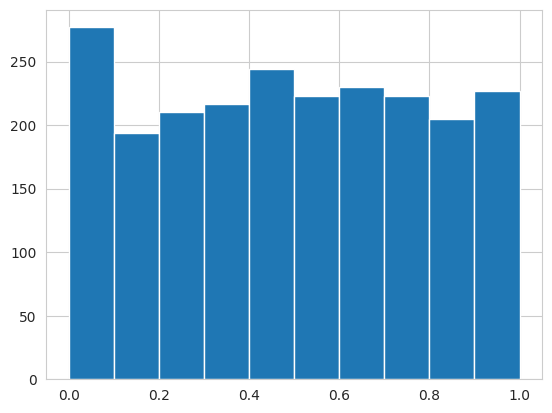

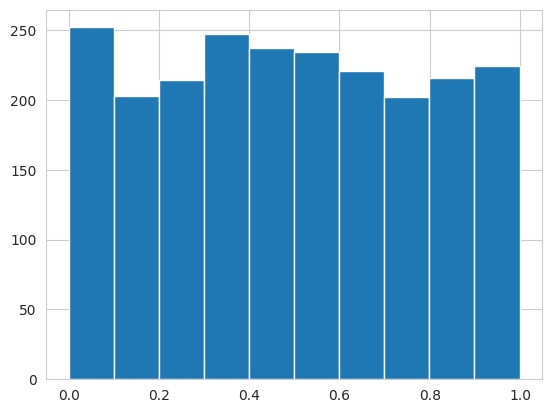

In [52]:
%matplotlib inline
plt.hist(MC.pts[:, 0])
plt.figure()
plt.hist(MC.pts[:, 1])


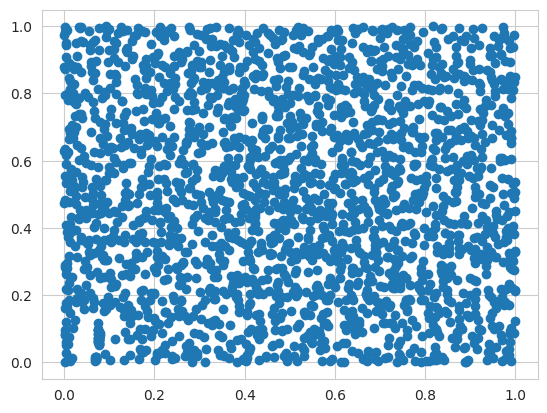

In [53]:
plt.scatter(MC.pts[:, 0], MC.pts[:, 1])

In [16]:
g_mc, A_mc = test_mcmc.MC_to_g_A(MC)
nk.overview(g_mc)

const_in: 0.17931646322859224
Network Properties:
nodes, edges			2250, 75074
directed?			False
weighted?			False
isolated nodes			14
self-loops			0
density				0.029672
clustering coefficient		0.313861
min/max/avg degree		0, 449, 66.732444
degree assortativity		0.071144
number of connected components	15
size of largest component	2236 (99.38 %)


In [17]:
CM = test_mcmc.quick_acc(A, A_mc)
CM
test_mcmc.quick_summarise_CM(CM)

CM = test_mcmc.quick_acc(A, A_init)
CM
test_mcmc.quick_summarise_CM(CM)

':('

array([[0.0024798 , 0.03085788],
       [0.02717906, 0.93948326]])

array([[0.07438438, 0.92561562],
       [0.0281164 , 0.9718836 ]])

':('

In [9]:
a = df.loc[:, ['Graph', 'Model', 'Nodes', 'Info']]
a

,Graph,Model,Nodes,Info
0,socfb-Caltech36,1d-copyweight-cube-girg,756,"{'tau': 7.3017225936374555, 'alpha': 1.2171928..."
1,socfb-Reed98,1d-copyweight-cube-girg,955,"{'tau': 4.381732472502371, 'alpha': 1.07671601..."
2,socfb-Caltech36,2d-copyweight-cube-girg,757,"{'tau': 7.3017225936374555, 'alpha': 1.1949215..."
3,socfb-Simmons81,1d-copyweight-cube-girg,1497,"{'tau': 4.739342146243066, 'alpha': 1.16300199..."
4,socfb-Haverford76,1d-copyweight-cube-girg,1440,"{'tau': 6.5461700448727616, 'alpha': 1.0592519..."
...,...,...,...,...
157,socfb-Bingham82,2d-copyweight-cube-girg,9945,"{'tau': 5.959769046529775, 'alpha': 1.07671601..."
158,socfb-Maine59,3d-copyweight-cube-girg,9001,"{'tau': 5.253031117549527, 'alpha': 1.10401932..."
159,socfb-Mississippi66,2d-copyweight-cube-girg,10496,"{'tau': 5.425199038576664, 'alpha': 1.05073058..."
160,socfb-Georgetown15,3d-copyweight-cube-girg,9341,"{'tau': 4.898184083615165, 'alpha': 1.04234527..."


In [21]:
a.loc[a.Graph == 'socfb-Pepperdine86']

,Graph,Model,Nodes,Info
41,socfb-Pepperdine86,1d-copyweight-cube-girg,3430,"{'tau': 5.27297948141534, 'alpha': 1.059251903..."
53,socfb-Pepperdine86,2d-copyweight-cube-girg,3426,"{'tau': 5.27297948141534, 'alpha': 1.025969862..."
67,socfb-Pepperdine86,3d-copyweight-cube-girg,3430,"{'tau': 5.27297948141534, 'alpha': 1.010101010..."


In [22]:
df.iloc[41].Info

{'tau': 5.27297948141534,
 'alpha': 1.0592519033432637,
 'const': 0.10914879350912529,
 'target_lcc': 0.27697571394183823,
 'fit_lcc': 0.2790005420603239,
 'fitting_time': 180.74201369285583,
 'hist': [(2.0, 0.614930496642529),
  (1.342281879194631, 0.42023462193045735),
  (1.1527377521613833, 0.3257112505037432),
  (1.0767160161507403, 0.2855294469587692),
  (1.0423452768729642, 0.26787251887177715),
  (1.0592519033432637, 0.2766223208246902),
  (1.0679125646587686, 0.28514010229395503),
  (1.0592519033432637, 0.2766223208246902)]}

In [23]:
df.iloc[53].Info

{'tau': 5.27297948141534,
 'alpha': 1.0259698621353,
 'const': 0.059451413878825084,
 'target_lcc': 0.27697571394183823,
 'fit_lcc': 0.2748780151815607,
 'fitting_time': 289.33652424812317,
 'hist': [(2.0, 0.5849583176785574),
  (1.342281879194631, 0.4251694982750488),
  (1.1527377521613833, 0.3434494442734461),
  (1.0767160161507403, 0.30518489387359304),
  (1.0423452768729642, 0.2834073963759906),
  (1.0259698621353, 0.274660388413119),
  (1.0340927451930846, 0.28050691796757915),
  (1.0259698621353, 0.274660388413119)]}

In [32]:
import importlib
importlib.reload(test_mcmc)

<module 'tests.test_mcmc' from '../tests/test_mcmc.py'>

In [31]:
# gd = do_feature_extract.graph_dicts[21]

gd = list(filter(lambda x: x['Name'] == 'socfb-Pepperdine86', do_feature_extract.graph_dicts))[0]

in_path = gd['FullPath']
in_path
name = gd['Name']
g = networkit.readGraph(in_path, networkit.Format.EdgeListSpaceOne)
g = utils.get_largest_component(g)
nk.overview(g)
n = g.numberOfNodes()

alpha = df.iloc[53].Info['alpha']
const = df.iloc[53].Info['const']

'/cluster/scratch/bdayan/GIRG_data/socfb-Pepperdine86.SpaceOne'

Network Properties:
nodes, edges			3440, 152003
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.025698
clustering coefficient		0.276976
min/max/avg degree		1, 674, 88.373837
degree assortativity		0.055527
number of connected components	1
size of largest component	3440 (100.00 %)


In [33]:
g, A, weights, const, pts_diffmap, pts_init, MC, MC_init = test_mcmc.test_diffmap_on_g(g, alpha=alpha, const=const, pts_d=2)

../benji_girgs/generation.py:78: RuntimeWarning: divide by zero encountered in true_divide
  p_uv = np.divide(wuwv, dists**d)


In [34]:
g_dm, A_dm = test_mcmc.MC_to_g_A(MC)
g_init, A_init = test_mcmc.MC_to_g_A(MC_init)
nk.overview(g_dm)
nk.overview(g_init)

CM = test_mcmc.quick_acc(A, A_dm)
CM
test_mcmc.quick_summarise_CM(CM)
print('============')
CM = test_mcmc.quick_acc(A, A_init)
CM
test_mcmc.quick_summarise_CM(CM)
':)'


const_in: 0.22909876856987865


../benji_girgs/generation.py:65: RuntimeWarning: divide by zero encountered in true_divide
  p_uv = np.divide(outer, dists**d)
../benji_girgs/generation.py:442: RuntimeWarning: divide by zero encountered in true_divide
  puv = np.stack([np.ones(original_edge_dists.shape), const_in * ((wu * wv / W) / original_edge_dists ** d) ** alpha]).min(axis=0)
../benji_girgs/generation.py:443: RuntimeWarning: divide by zero encountered in true_divide
  puv_cube = np.stack([np.ones(cube_edge_dists.shape), const_in * ((wu * wv / W) / cube_edge_dists ** d) ** alpha]).min(axis=0)


const_in: 0.22909876856987865
Network Properties:
nodes, edges			3440, 2987323
directed?			False
weighted?			False
isolated nodes			12
self-loops			0
density				0.505035
clustering coefficient		0.841734
min/max/avg degree		0, 2699, 1736.815698
degree assortativity		0.354706
number of connected components	13
size of largest component	3428 (99.65 %)
Network Properties:
nodes, edges			3440, 152170
directed?			False
weighted?			False
isolated nodes			15
self-loops			0
density				0.025726
clustering coefficient		0.276121
min/max/avg degree		0, 404, 88.470930
degree assortativity		0.041911
number of connected components	16
size of largest component	3425 (99.56 %)


array([[0.0238051 , 0.00188497],
       [0.48108319, 0.49322674]])

array([[0.92662645, 0.07337355],
       [0.49376812, 0.50623188]])

array([[0.00170988, 0.02398019],
       [0.02400842, 0.95030151]])

array([[0.0665579 , 0.9334421 ],
       [0.02464146, 0.97535854]])

':)'

In [ ]:
MC.run_pool(20000, pool_size=15, jobs_per_worker=15, plot_every=20)

In [4]:
from tests import test_mcmc
from tests.test_mcmc import *
import importlib
importlib.reload(test_mcmc)
g, A, weights, const, pts, pts_diffmap, pts_init, MC, MC_init, MC_cheat = test_mcmc.test_diffmap()

g_dm, A_dm = test_mcmc.MC_to_g_A(MC)
g_init, A_init = test_mcmc.MC_to_g_A(MC_init)
g_cheat, A_cheat = test_mcmc.MC_to_g_A(MC_cheat)


<module 'tests.test_mcmc' from '../tests/test_mcmc.py'>

const_in: 21.744500891857935


../benji_girgs/generation.py:65: RuntimeWarning: divide by zero encountered in true_divide
  p_uv = np.divide(outer, dists**d)
../benji_girgs/generation.py:442: RuntimeWarning: divide by zero encountered in true_divide
  puv = np.stack([np.ones(original_edge_dists.shape), const_in * ((wu * wv / W) / original_edge_dists ** d) ** alpha]).min(axis=0)
../benji_girgs/generation.py:443: RuntimeWarning: divide by zero encountered in true_divide
  puv_cube = np.stack([np.ones(cube_edge_dists.shape), const_in * ((wu * wv / W) / cube_edge_dists ** d) ** alpha]).min(axis=0)
../benji_girgs/generation.py:78: RuntimeWarning: divide by zero encountered in true_divide
  p_uv = np.divide(wuwv, dists**d)


const_in: 21.744500891857935
const_in: 21.744500891857935
const_in: 21.744500891857935


In [6]:
(const*2)**alpha

21.744500891857935

In [7]:
g_temp, _, _, _, _ = generation.generate_GIRG_nk(n, d, tau, alpha, weights=weights, pts=pts, const=const)

const_in: 21.744500891857935


In [8]:
const

6.507705243675296

In [9]:
pts

PointsCube([[0.63956876],
            [0.20144225],
            [0.07984331],
            ...,
            [0.88855468],
            [0.70501783],
            [0.04734976]])

In [10]:
nk.overview(g)
nk.overview(g_temp)

Network Properties:
nodes, edges			1500, 70397
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.062617
clustering coefficient		0.563041
min/max/avg degree		21, 1499, 93.862667
degree assortativity		-0.199725
number of connected components	1
size of largest component	1500 (100.00 %)
Network Properties:
nodes, edges			1500, 70327
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.062555
clustering coefficient		0.562545
min/max/avg degree		18, 1499, 93.769333
degree assortativity		-0.199262
number of connected components	1
size of largest component	1500 (100.00 %)


In [11]:
nk.overview(g_cheat)

Network Properties:
nodes, edges			1500, 70672
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.062861
clustering coefficient		0.560786
min/max/avg degree		21, 1499, 94.229333
degree assortativity		-0.199488
number of connected components	1
size of largest component	1500 (100.00 %)


In [12]:
nk.overview(g_dm)

Network Properties:
nodes, edges			1500, 77445
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.068886
clustering coefficient		0.570072
min/max/avg degree		10, 1499, 103.260000
degree assortativity		-0.197577
number of connected components	1
size of largest component	1500 (100.00 %)


In [18]:
CM = test_mcmc.quick_acc(A, A_cheat)
CM
test_mcmc.quick_summarise_CM(CM)
print('============')
CM = test_mcmc.quick_acc(A, A_dm)
CM
test_mcmc.quick_summarise_CM(CM)
print('============')
CM = test_mcmc.quick_acc(A, A_init)
CM
test_mcmc.quick_summarise_CM(CM)


array([[0.03788   , 0.02469511],
       [0.02493956, 0.91248533]])

array([[0.6053525 , 0.3946475 ],
       [0.02660432, 0.97339568]])

array([[0.03113422, 0.03144089],
       [0.03770578, 0.89971911]])

array([[0.49754961, 0.50245039],
       [0.04022272, 0.95977728]])

array([[0.01840444, 0.04417067],
       [0.04421867, 0.89320622]])

array([[0.29411765, 0.70588235],
       [0.04717036, 0.95282964]])

In [20]:
np.where(A[0, :])

(array([   7,   15,   17,   20,   23,   38,   53,   75,   77,   86,   88,
          89,  113,  141,  166,  176,  216,  224,  247,  251,  252,  271,
         272,  279,  310,  320,  345,  347,  371,  379,  392,  419,  440,
         447,  452,  456,  469,  488,  493,  505,  522,  526,  545,  559,
         572,  574,  606,  612,  614,  621,  625,  643,  648,  653,  658,
         667,  673,  682,  717,  721,  736,  761,  762,  774,  782,  786,
         805,  817,  835,  837,  844,  849,  897,  900,  904,  917,  929,
         932,  941,  943,  949,  956,  960,  964,  968,  978,  997,  999,
        1017, 1019, 1053, 1062, 1087, 1097, 1100, 1117, 1135, 1140, 1150,
        1163, 1165, 1169, 1170, 1183, 1184, 1216, 1228, 1241, 1252, 1269,
        1284, 1321, 1326, 1338, 1345, 1362, 1382, 1383, 1391, 1397, 1402,
        1422, 1477, 1486]),)

In [14]:
list(g.iterNeighbors(0))

[18,
 66,
 98,
 116,
 169,
 176,
 187,
 198,
 260,
 302,
 311,
 343,
 361,
 367,
 1492,
 403,
 413,
 445,
 446,
 456,
 467,
 475,
 476,
 514,
 520,
 523,
 529,
 541,
 576,
 607,
 614,
 662,
 689,
 700,
 717,
 722,
 754,
 769,
 801,
 808,
 841,
 848,
 884,
 888,
 900,
 903,
 913,
 917,
 923,
 938,
 984,
 986,
 991,
 1006,
 1009,
 1015,
 1021,
 1034,
 1041,
 1042,
 1050,
 1051,
 1071,
 1104,
 1114,
 1169,
 1177,
 1179,
 1189,
 1234,
 1235,
 1255,
 1265,
 1297,
 1301,
 1317,
 1333,
 1344,
 1395,
 1438,
 1449,
 1454,
 1456,
 1459,
 1470,
 1472]

In [15]:
list(g_temp.iterNeighbors(0))

[18,
 66,
 75,
 86,
 98,
 116,
 126,
 169,
 173,
 176,
 192,
 194,
 198,
 212,
 229,
 256,
 260,
 302,
 311,
 343,
 361,
 362,
 367,
 403,
 413,
 433,
 446,
 456,
 467,
 476,
 514,
 517,
 521,
 523,
 529,
 607,
 613,
 648,
 692,
 712,
 714,
 722,
 740,
 754,
 764,
 801,
 836,
 841,
 884,
 888,
 900,
 929,
 950,
 984,
 986,
 991,
 1006,
 1050,
 1051,
 1065,
 1071,
 1104,
 1114,
 1169,
 1179,
 1189,
 1198,
 1218,
 1234,
 1235,
 1257,
 1301,
 1313,
 1317,
 1340,
 1344,
 1361,
 1413,
 1434,
 1438,
 1449,
 1454,
 1456,
 1498]

In [16]:
len(list(g_temp.iterNeighbors(0)))
len(list(g.iterNeighbors(0)))

84

86

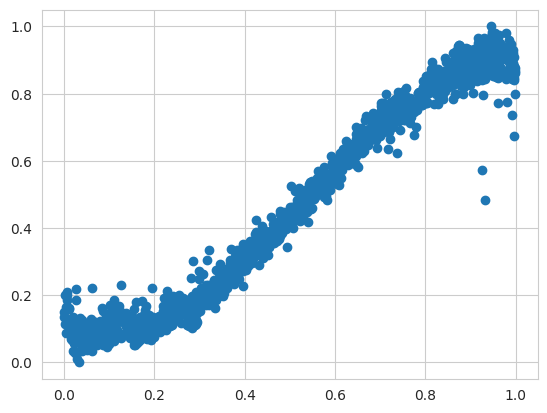

In [6]:
plt.scatter(pts[:, 0], pts_diffmap[:, 0])

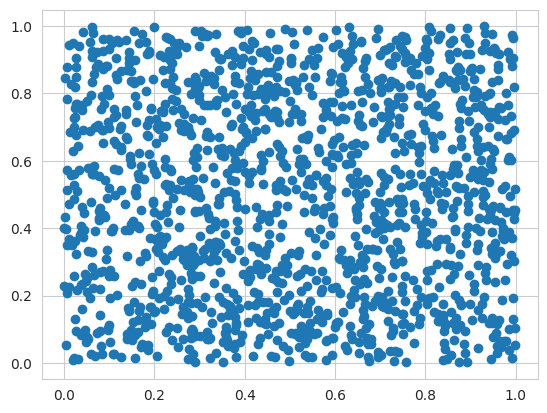

In [7]:
plt.scatter(pts[:, 0], pts_init[:, 0])